**team members:**

Linjing Rao (Lr534)

Minyu Huang (mh2223)

Yubang Wu (yw2467)

# **The purpose of this analysis is to perform exploratory data analysis and data visualization of Airbnb listings. Trying to understand how different actors affect users' ratings of Airbnb listings eg. listing price,amenities,locations, reviews, hosts.Finally, using machine learning techniques to predict the ratings of listings. ** 

What do airbnb users value the most when rating? 
Does the airbnb owner's amenities list description, match with what users complement on the most or value the most when they write their reveiws?
What is the most common amenity listed in the decription?
What neighbourhood in nyc have the highest/lowest reveiw score, why?

## Project Milestone


Based on the previous proposal, we attempted to compare Covid data and airbnb historical price data to determine the impact of the epidemic on airbnb. We screened the covid and airbnb data by screening the data for the period 2020-2021 to meet the desired research objectives we originally proposed. However, we found that airbnb's calendar and listing dataset lacked data for 2020-2021 and only had data for 2021-2022. There were also no actual sales prices recorded daily in the data, only projected future prices. Therefore we could not compare it with the covid data.

Due to the insufficient dataset reason, we have changed from the initial proposal to studying airbnb as a separate dataset. With the updated proposal we will explore which factors affect users' ratings of Airbnb listings, e.g., price of the listing, amenities, location, reviews, etc. Therefore, our target users are hosts and the airbnb platform. We hope our results can give hosts and airbnb platforms some rational suggestions.
For our proposal, we first replaced the data set with a newer, more comprehensive one. It contains a series of data that can be analyzed, such as amenities, ratings, landlord profiles, specific prices, reviews, and rentals. This time, we visualized the basic information of the data. Firstly, we cleaned the data from null data, wrong data and unnecessary data. Then we visualized some basic information like the nyc airbnb price and area. Next stage, we are plannning to study the correlation between different factors of house ratings.Then using Sklearn to do the multiple Linear Regression. After fitting the model, we can do the model prediction of listings' ratings.





## 1) any data processing or analysis you have done thus far; 
**We have imported the most recent and detailed NYC airbnb listing dataset for analysing the reveiw score and finding variables that have potential impact/ correlations.**

1. overveiw of listing data, looked at the number of null data, shape, column names 
2. clean data by percentage of misisng value, take out outliers such as extreme high price values and extraordinary data for max_nights using Z score greater than 3.
3. Data visualization eg.price data in NYC by map visualization
4. plots eg. average/mean price, rating, number of amenities
5. word cloud visualization for frequency of different amenities listed by airbnb hosts.

## 2) the analysis you still intend to do;
**We intend to further analyze and conduct machine learning to learn to train model fo review scores based on variables such as price, amenities, location, number of bedrooms. We planned to try different regressions to fit the data and find the model that best fits the data and makes the most accurate prediction.** 
6. Select a few variables with the strongest relationships and organize them
7. One-hot coding for the categorical variables
8. Standardscaler for the continuous data
9. Split data into train and test sets, Fit the model to find predictions for review scores.
10. Fit the regression using Sklearn, by observing the model score to predict the difference between the actual value and the predicted value
11. Random Forest Regressor (Optional) and check the accuracy again
12. Model Prediction
13. Visualize the prediction results with matplotlib.

## Clean data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [ ]:
df_listing = pd.read_csv('/content/gdrive/MyDrive/INFO Urban Data_HW/Urban Data Final Project/data/Review_listing_full_data/listings.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_listing.head()

id                         listing_url       scrape_id last_scraped  \
0   2539   https://www.airbnb.com/rooms/2539  20220907064715   2022-09-07   
1   2595   https://www.airbnb.com/rooms/2595  20220907064715   2022-09-07   
2   5121   https://www.airbnb.com/rooms/5121  20220907064715   2022-09-07   
3  45910  https://www.airbnb.com/rooms/45910  20220907064715   2022-09-07   
4   5136   https://www.airbnb.com/rooms/5136  20220907064715   2022-09-07   

        source                                      name  \
0  city scrape        Clean & quiet apt home by the park   
1  city scrape                     Skylit Midtown Castle   
2  city scrape                           BlissArtsSpace!   
3  city scrape        Beautiful Queens Brownstone! - 5BR   
4  city scrape  Spacious Brooklyn Duplex, Patio + Garden   

                                         description  \
0  Renovated apt home in elevator building.<br />...   
1  Beautiful, spacious skylit studio in the heart...   
2  One room available for rent in a 2 bedroom apt...   
3  <b>The space</b><br />Beautiful, fully furnish...   
4  We welcome you to stay in our lovely 2 br dupl...   

                               neighborhood_overview  \
0    Close to Prospect Park and Historic Ditmas Park   
1  Centrally located in the heart of Manhattan ju...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/3949d073-a02e...     2787  ...   
1  https://a0.muscache.com/pictures/f0813a11-40b2...     2845  ...   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356  ...   
3  https://a0.muscache.com/pictures/27117627/19ff...   204539  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...     7378  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        5.00                   4.75                4.88   
1                        4.80                   4.81                4.40   
2                        4.91                   4.47                4.52   
3                        5.00                   4.82                4.55   
4                        5.00                   4.67                5.00   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              9   
1     NaN                f                              3   
2     NaN                f                              2   
3     NaN                f                              6   
4     NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           3   
2                                           0   
3                                           6   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            6   
1                                            0   
2                                            2   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           2              0.11  
1                                           0              0.31  
2                                           0              0.31  
3                                           0              0.10  
4                                           0              0.03  

[5 rows x 75 columns]

In [ ]:
#shape of listing data
print('Lising data shape:', df_listing.shape)

Lising data shape: (39881, 75)


In [ ]:
#null data from highest to lowest
df_listing.isnull().sum().sort_values(ascending=False)

bathrooms                39881
calendar_updated         39881
license                  39876
host_about               17372
neighborhood_overview    16415
                         ...  
availability_60              0
availability_90              0
availability_365             0
calendar_last_scraped        0
id                           0
Length: 75, dtype: int64

In [ ]:
#check column names and data type
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39881 non-null  int64  
 1   listing_url                                   39881 non-null  object 
 2   scrape_id                                     39881 non-null  int64  
 3   last_scraped                                  39881 non-null  object 
 4   source                                        39881 non-null  object 
 5   name                                          39868 non-null  object 
 6   description                                   39036 non-null  object 
 7   neighborhood_overview                         23466 non-null  object 
 8   picture_url                                   39881 non-null  object 
 9   host_id                                       39881 non-null 

In [ ]:
#checking missing null value by percentage over total data
null_percent =df_listing.isna().sum()/len(df_listing)*100
null_percent[null_percent!=0].sort_values(ascending=False)

bathrooms                      100.000000
calendar_updated               100.000000
license                         99.987463
host_about                      43.559590
neighborhood_overview           41.159951
neighbourhood                   41.157443
host_response_time              33.971064
host_response_rate              33.971064
host_acceptance_rate            29.740979
review_scores_value             22.145884
review_scores_location          22.145884
review_scores_checkin           22.138362
review_scores_accuracy          22.128332
review_scores_communication     22.115794
review_scores_cleanliness       22.103257
last_review                     20.967378
reviews_per_month               20.967378
review_scores_rating            20.967378
first_review                    20.967378
host_neighbourhood              20.638901
host_location                   17.258845
bedrooms                         9.485720
beds                             2.216594
description                      2

In [ ]:
#drop columns with high percentage of null data: bathroom, calender_updated, license, host_about
df_filtered = df_listing.drop(['bathrooms','calendar_updated','license','host_about'], axis=1)
df_filtered.head()

id                         listing_url       scrape_id last_scraped  \
0   2539   https://www.airbnb.com/rooms/2539  20220907064715   2022-09-07   
1   2595   https://www.airbnb.com/rooms/2595  20220907064715   2022-09-07   
2   5121   https://www.airbnb.com/rooms/5121  20220907064715   2022-09-07   
3  45910  https://www.airbnb.com/rooms/45910  20220907064715   2022-09-07   
4   5136   https://www.airbnb.com/rooms/5136  20220907064715   2022-09-07   

        source                                      name  \
0  city scrape        Clean & quiet apt home by the park   
1  city scrape                     Skylit Midtown Castle   
2  city scrape                           BlissArtsSpace!   
3  city scrape        Beautiful Queens Brownstone! - 5BR   
4  city scrape  Spacious Brooklyn Duplex, Patio + Garden   

                                         description  \
0  Renovated apt home in elevator building.<br />...   
1  Beautiful, spacious skylit studio in the heart...   
2  One room available for rent in a 2 bedroom apt...   
3  <b>The space</b><br />Beautiful, fully furnish...   
4  We welcome you to stay in our lovely 2 br dupl...   

                               neighborhood_overview  \
0    Close to Prospect Park and Historic Ditmas Park   
1  Centrally located in the heart of Manhattan ju...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/3949d073-a02e...     2787  ...   
1  https://a0.muscache.com/pictures/f0813a11-40b2...     2845  ...   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356  ...   
3  https://a0.muscache.com/pictures/27117627/19ff...   204539  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...     7378  ...   

  review_scores_checkin review_scores_communication review_scores_location  \
0                  5.00                        5.00                   4.75   
1                  4.77                        4.80                   4.81   
2                  4.91                        4.91                   4.47   
3                  4.82                        5.00                   4.82   
4                  5.00                        5.00                   4.67   

  review_scores_value instant_bookable calculated_host_listings_count  \
0                4.88                f                              9   
1                4.40                f                              3   
2                4.52                f                              2   
3                4.55                f                              6   
4                5.00                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           3   
2                                           0   
3                                           6   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            6   
1                                            0   
2                                            2   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           2              0.11  
1                                           0              0.31  
2                                           0              0.31  
3                                           0              0.10  
4                                           0              0.03  

[5 rows x 71 columns]

In [ ]:
#drop columns with high percentage of null data: bathroom, calender_updated, license, 
#not needed information: host_about,host_picture_url, host_thumbnail_url
df_filtered = df_listing.drop(['bathrooms','calendar_updated','license','host_about','host_picture_url', 'host_thumbnail_url','picture_url','listing_url',
                               'scrape_id','last_scraped','source','host_url','host_id','host_name','host_since','host_neighbourhood','host_location',
                               'calculated_host_listings_count','calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                               'calculated_host_listings_count_shared_rooms','last_review','first_review','minimum_minimum_nights','maximum_minimum_nights',
                               'minimum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30', 'availability_60', 'availability_90',
                               'calendar_last_scraped','maximum_maximum_nights','neighbourhood','neighborhood_overview', 'number_of_reviews_ltm',
                                'number_of_reviews_l30d','name','description'], axis=1)
df_filtered.head()

id host_response_time host_response_rate host_acceptance_rate  \
0   2539     within an hour               100%                  90%   
1   2595       within a day                75%                  23%   
2   5121     within an hour               100%                 100%   
3  45910     within an hour               100%                  19%   
4   5136                NaN                NaN                  33%   

  host_is_superhost  host_listings_count  host_total_listings_count  \
0                 f                  9.0                       12.0   
1                 f                  6.0                        9.0   
2                 t                  2.0                        2.0   
3                 f                  7.0                        7.0   
4                 f                  1.0                        5.0   

                 host_verifications host_has_profile_pic  \
0                ['email', 'phone']                    t   
1  ['email', 'phone', 'work_email']                    t   
2                ['email', 'phone']                    t   
3                ['email', 'phone']                    t   
4                ['email', 'phone']                    t   

  host_identity_verified  ... number_of_reviews review_scores_rating  \
0                      t  ...                 9                 4.89   
1                      t  ...                49                 4.68   
2                      t  ...                50                 4.52   
3                      t  ...                13                 4.42   
4                      t  ...                 3                 5.00   

   review_scores_accuracy  review_scores_cleanliness review_scores_checkin  \
0                    4.88                       5.00                  5.00   
1                    4.73                       4.63                  4.77   
2                    4.22                       4.09                  4.91   
3                    4.64                       4.36                  4.82   
4                    5.00                       5.00                  5.00   

  review_scores_communication  review_scores_location review_scores_value  \
0                        5.00                    4.75                4.88   
1                        4.80                    4.81                4.40   
2                        4.91                    4.47                4.52   
3                        5.00                    4.82                4.55   
4                        5.00                    4.67                5.00   

   instant_bookable  reviews_per_month  
0                 f               0.11  
1                 f               0.31  
2                 f               0.31  
3                 f               0.10  
4                 f               0.03  

[5 rows x 36 columns]

In [ ]:
df_filtered.columns

Index(['id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [ ]:
#
df_filtered.isnull().sum().sort_values(ascending=False)

host_response_time              13548
host_response_rate              13548
host_acceptance_rate            11861
review_scores_value              8832
review_scores_location           8832
review_scores_checkin            8829
review_scores_accuracy           8825
review_scores_communication      8820
review_scores_cleanliness        8815
reviews_per_month                8362
review_scores_rating             8362
bedrooms                         3783
beds                              884
bathrooms_text                     84
host_listings_count                50
host_total_listings_count          50
host_has_profile_pic               50
host_identity_verified             50
host_is_superhost                  29
latitude                            0
availability_365                    0
instant_bookable                    0
host_verifications                  0
neighbourhood_cleansed              0
number_of_reviews                   0
has_availability                    0
longitude   

In [ ]:
#price is object need to convert to float num
print('length of price column before:',len(df_filtered['price']))
df_filtered['price'] = df_filtered['price'].replace('[\$,]', '', regex=True).astype(float)
print('length of price column after:',len(df_filtered['price']))

length of price column before: 39881
length of price column after: 39881


In [ ]:
#converted price column to 
df_filtered['price']

0        299.0
1        175.0
2         60.0
3        425.0
4        275.0
         ...  
39876    157.0
39877    108.0
39878    140.0
39879    400.0
39880     40.0
Name: price, Length: 39881, dtype: float64

In [ ]:
df_filtered

id  host_response_time host_response_rate  \
0                    2539      within an hour               100%   
1                    2595        within a day                75%   
2                    5121      within an hour               100%   
3                   45910      within an hour               100%   
4                    5136                 NaN                NaN   
...                   ...                 ...                ...   
39876            43728504      within an hour               100%   
39877            44578886      within an hour               100%   
39878            46355090      within an hour               100%   
39879  698195550745703156                 NaN                NaN   
39880            48971505  within a few hours               100%   

      host_acceptance_rate host_is_superhost  host_listings_count  \
0                      90%                 f                  9.0   
1                      23%                 f                  6.0   
2                     100%                 t                  2.0   
3                      19%                 f                  7.0   
4                      33%                 f                  1.0   
...                    ...               ...                  ...   
39876                  94%                 f                  5.0   
39877                  96%                 t                  1.0   
39878                  71%                 f                  1.0   
39879                  NaN                 f                  1.0   
39880                  46%                 f                  3.0   

       host_total_listings_count                host_verifications  \
0                           12.0                ['email', 'phone']   
1                            9.0  ['email', 'phone', 'work_email']   
2                            2.0                ['email', 'phone']   
3                            7.0                ['email', 'phone']   
4                            5.0                ['email', 'phone']   
...                          ...                               ...   
39876                        9.0  ['email', 'phone', 'work_email']   
39877                        1.0  ['email', 'phone', 'work_email']   
39878                        1.0                         ['phone']   
39879                        1.0                ['email', 'phone']   
39880                        4.0                ['email', 'phone']   

      host_has_profile_pic host_identity_verified  ... number_of_reviews  \
0                        t                      t  ...                 9   
1                        t                      t  ...                49   
2                        t                      t  ...                50   
3                        t                      t  ...                13   
4                        t                      t  ...                 3   
...                    ...                    ...  ...               ...   
39876                    t                      t  ...                33   
39877                    t                      t  ...                52   
39878                    t                      t  ...                11   
39879                    t                      t  ...                 0   
39880                    t                      t  ...                15   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                     4.89                    4.88                       5.00   
1                     4.68                    4.73                       4.63   
2                     4.52                    4.22                       4.09   
3                     4.42                    4.64                       4.36   
4                     5.00                    5.00                       5.00   
...                    ...                     ...                        ...   
39876                 4.91                    4.97      

In [ ]:
#drop null values for rest
df_filtered = df_filtered.dropna()

In [ ]:
#droped all null
df_filtered.isnull().sum().sort_values(ascending=False)

id                              0
host_response_time              0
amenities                       0
price                           0
minimum_nights                  0
maximum_nights                  0
has_availability                0
availability_365                0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
instant_bookable                0
beds                            0
bedrooms                        0
bathrooms_text                  0
host_has_profile_pic            0
host_response_rate              0
host_acceptance_rate            0
host_is_superhost               0
host_listings_count             0
host_total_listings_count       0
host_verifications              0
host_identity_verified          0
accommodates                    0
neighbourhood_

In [ ]:
df_filtered

id  host_response_time host_response_rate host_acceptance_rate  \
0          2539      within an hour               100%                  90%   
3         45910      within an hour               100%                  19%   
6         77765      within an hour                99%                  98%   
7          5178  within a few hours               100%                 100%   
8         80493      within an hour               100%                  86%   
...         ...                 ...                ...                  ...   
39871  38361585      within an hour               100%                 100%   
39873  42971489  a few days or more                46%                  75%   
39876  43728504      within an hour               100%                  94%   
39877  44578886      within an hour               100%                  96%   
39878  46355090      within an hour               100%                  71%   

      host_is_superhost  host_listings_count  host_total_listings_count  \
0                     f                  9.0                       12.0   
3                     f                  7.0                        7.0   
6                     t                 30.0                       40.0   
7                     f                  1.0                        1.0   
8                     f                  1.0                        1.0   
...                 ...                  ...                        ...   
39871                 f                  1.0                        1.0   
39873                 f                  5.0                        5.0   
39876                 f                  5.0                        9.0   
39877                 t                  1.0                        1.0   
39878                 f                  1.0                        1.0   

                     host_verifications host_has_profile_pic  \
0                    ['email', 'phone']                    t   
3                    ['email', 'phone']                    t   
6      ['email', 'phone', 'work_email']                    t   
7                    ['email', 'phone']                    t   
8                    ['email', 'phone']                    t   
...                                 ...                  ...   
39871                ['email', 'phone']                    t   
39873                ['email', 'phone']                    t   
39876  ['email', 'phone', 'work_email']                    t   
39877  ['email', 'phone', 'work_email']                    t   
39878                         ['phone']                    t   

      host_identity_verified  ... number_of_reviews review_scores_rating  \
0                          t  ...                 9                 4.89   
3                          t  ...                13                 4.42   
6                          t  ...                42                 4.90   
7                          f  ...               550                 4.23   
8                          t  ...               207                 4.34   
...                      ...  ...               ...                  ...   
39871                      t  ...                 6                 5.00   
39873                      t  ...                 3                 5.00   
39876                      t  ...                33                 4.91   
39877                      t  ...                52                 4.79   
39878                      t  ...                11                 4.45   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.88                       5.00   
3                        4.64                       4.36   
6                        4.98                       4.95   
7                        4.24                       3.75   
8                        4.44                       3.88   
...                       ...                        ...   
39871                    5.00                       5.00   
3

## df_filtered: More Data Cleaning (Outliners + tiny review numbers + text to number)

In [ ]:
# remove outliers
from scipy import stats
df_filtered['z_price'] = np.abs(stats.zscore(df_filtered['price']))
df_filtered['z_reviews_per_month'] = np.abs(stats.zscore(df_filtered['reviews_per_month']))
df_filtered['z_number_of_reviews'] = np.abs(stats.zscore(df_filtered['number_of_reviews']))

<ipython-input-20-573dbda1f340>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['z_price'] = np.abs(stats.zscore(df_filtered['price']))
<ipython-input-20-573dbda1f340>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['z_reviews_per_month'] = np.abs(stats.zscore(df_filtered['reviews_per_month']))
<ipython-input-20-573dbda1f340>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
df_filtered

id  host_response_time host_response_rate host_acceptance_rate  \
0          2539      within an hour               100%                  90%   
3         45910      within an hour               100%                  19%   
6         77765      within an hour                99%                  98%   
7          5178  within a few hours               100%                 100%   
8         80493      within an hour               100%                  86%   
...         ...                 ...                ...                  ...   
39871  38361585      within an hour               100%                 100%   
39873  42971489  a few days or more                46%                  75%   
39876  43728504      within an hour               100%                  94%   
39877  44578886      within an hour               100%                  96%   
39878  46355090      within an hour               100%                  71%   

      host_is_superhost  host_listings_count  host_total_listings_count  \
0                     f                  9.0                       12.0   
3                     f                  7.0                        7.0   
6                     t                 30.0                       40.0   
7                     f                  1.0                        1.0   
8                     f                  1.0                        1.0   
...                 ...                  ...                        ...   
39871                 f                  1.0                        1.0   
39873                 f                  5.0                        5.0   
39876                 f                  5.0                        9.0   
39877                 t                  1.0                        1.0   
39878                 f                  1.0                        1.0   

                     host_verifications host_has_profile_pic  \
0                    ['email', 'phone']                    t   
3                    ['email', 'phone']                    t   
6      ['email', 'phone', 'work_email']                    t   
7                    ['email', 'phone']                    t   
8                    ['email', 'phone']                    t   
...                                 ...                  ...   
39871                ['email', 'phone']                    t   
39873                ['email', 'phone']                    t   
39876  ['email', 'phone', 'work_email']                    t   
39877  ['email', 'phone', 'work_email']                    t   
39878                         ['phone']                    t   

      host_identity_verified  ... review_scores_cleanliness  \
0                          t  ...                      5.00   
3                          t  ...                      4.36   
6                          t  ...                      4.95   
7                          f  ...                      3.75   
8                          t  ...                      3.88   
...                      ...  ...                       ...   
39871                      t  ...                      5.00   
39873                      t  ...                      5.00   
39876                      t  ...                      4.88   
39877                      t  ...                      4.75   
39878                      t  ...                      4.27   

      review_scores_checkin  review_scores_communication  \
0                      5.00                         5.00   
3                      4.82                         5.00   
6                      4.98                         4.88   
7                      4.66                         4.46   
8                      4.84                         4.76   
...                     ...                          ...   
39871                  5.00                         5.00   
39873                  5.00                         5.00   
39876                  4.97                         5.00   
39877                  5.00          

In [ ]:
# remove z scroe that are greater than 3
df_filtered = df_filtered[(df_filtered['z_price'] < 3)]
df_filtered = df_filtered[(df_filtered['z_reviews_per_month'] < 3)]
df_filtered = df_filtered[(df_filtered['z_number_of_reviews'] < 3)]

In [ ]:
df_filtered

id  host_response_time host_response_rate host_acceptance_rate  \
0          2539      within an hour               100%                  90%   
3         45910      within an hour               100%                  19%   
6         77765      within an hour                99%                  98%   
8         80493      within an hour               100%                  86%   
9         80684      within an hour                99%                  98%   
...         ...                 ...                ...                  ...   
39871  38361585      within an hour               100%                 100%   
39873  42971489  a few days or more                46%                  75%   
39876  43728504      within an hour               100%                  94%   
39877  44578886      within an hour               100%                  96%   
39878  46355090      within an hour               100%                  71%   

      host_is_superhost  host_listings_count  host_total_listings_count  \
0                     f                  9.0                       12.0   
3                     f                  7.0                        7.0   
6                     t                 30.0                       40.0   
8                     f                  1.0                        1.0   
9                     t                 30.0                       40.0   
...                 ...                  ...                        ...   
39871                 f                  1.0                        1.0   
39873                 f                  5.0                        5.0   
39876                 f                  5.0                        9.0   
39877                 t                  1.0                        1.0   
39878                 f                  1.0                        1.0   

                     host_verifications host_has_profile_pic  \
0                    ['email', 'phone']                    t   
3                    ['email', 'phone']                    t   
6      ['email', 'phone', 'work_email']                    t   
8                    ['email', 'phone']                    t   
9      ['email', 'phone', 'work_email']                    t   
...                                 ...                  ...   
39871                ['email', 'phone']                    t   
39873                ['email', 'phone']                    t   
39876  ['email', 'phone', 'work_email']                    t   
39877  ['email', 'phone', 'work_email']                    t   
39878                         ['phone']                    t   

      host_identity_verified  ... review_scores_cleanliness  \
0                          t  ...                      5.00   
3                          t  ...                      4.36   
6                          t  ...                      4.95   
8                          t  ...                      3.88   
9                          t  ...                      5.00   
...                      ...  ...                       ...   
39871                      t  ...                      5.00   
39873                      t  ...                      5.00   
39876                      t  ...                      4.88   
39877                      t  ...                      4.75   
39878                      t  ...                      4.27   

      review_scores_checkin  review_scores_communication  \
0                      5.00                         5.00   
3                      4.82                         5.00   
6                      4.98                         4.88   
8                      4.84                         4.76   
9                      5.00                         4.89   
...                     ...                          ...   
39871                  5.00                         5.00   
39873                  5.00                         5.00   
39876                  4.97                         5.00   
39877                  5.00          

In [ ]:
#remove tiny review numbers
df_filtered = df_filtered[(df_filtered['number_of_reviews'] > 2)]
df_filtered['number_of_reviews'].describe()

count    15124.000000
mean        42.236644
std         49.991121
min          3.000000
25%          8.000000
50%         22.000000
75%         56.000000
max        249.000000
Name: number_of_reviews, dtype: float64

In [ ]:
# text to number
df_filtered['host_response_rate'] = df_filtered['host_response_rate'].str.strip("%").astype(float)/100
df_filtered['host_acceptance_rate'] = df_filtered['host_acceptance_rate'].str.strip("%").astype(float)/100

<ipython-input-25-9740212bfee5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['host_response_rate'] = df_filtered['host_response_rate'].str.strip("%").astype(float)/100
<ipython-input-25-9740212bfee5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['host_acceptance_rate'] = df_filtered['host_acceptance_rate'].str.strip("%").astype(float)/100


In [ ]:
# t/f to number
df_filtered['host_is_superhost'].replace({'f': 0, 't': 1}, inplace = True)
df_filtered['host_has_profile_pic'].replace({'f': 0, 't': 1}, inplace = True)
df_filtered['host_identity_verified'].replace({'f': 0, 't': 1}, inplace = True)
df_filtered['host_response_time'].replace({'within an hour': 4, 'within a few hours': 3, 'within a day': 2, 'a few days or more':	1}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_filtered

id  host_response_time  host_response_rate  host_acceptance_rate  \
0          2539                   4                1.00                  0.90   
3         45910                   4                1.00                  0.19   
6         77765                   4                0.99                  0.98   
8         80493                   4                1.00                  0.86   
9         80684                   4                0.99                  0.98   
...         ...                 ...                 ...                   ...   
39871  38361585                   4                1.00                  1.00   
39873  42971489                   1                0.46                  0.75   
39876  43728504                   4                1.00                  0.94   
39877  44578886                   4                1.00                  0.96   
39878  46355090                   4                1.00                  0.71   

       host_is_superhost  host_listings_count  host_total_listings_count  \
0                      0                  9.0                       12.0   
3                      0                  7.0                        7.0   
6                      1                 30.0                       40.0   
8                      0                  1.0                        1.0   
9                      1                 30.0                       40.0   
...                  ...                  ...                        ...   
39871                  0                  1.0                        1.0   
39873                  0                  5.0                        5.0   
39876                  0                  5.0                        9.0   
39877                  1                  1.0                        1.0   
39878                  0                  1.0                        1.0   

                     host_verifications  host_has_profile_pic  \
0                    ['email', 'phone']                     1   
3                    ['email', 'phone']                     1   
6      ['email', 'phone', 'work_email']                     1   
8                    ['email', 'phone']                     1   
9      ['email', 'phone', 'work_email']                     1   
...                                 ...                   ...   
39871                ['email', 'phone']                     1   
39873                ['email', 'phone']                     1   
39876  ['email', 'phone', 'work_email']                     1   
39877  ['email', 'phone', 'work_email']                     1   
39878                         ['phone']                     1   

       host_identity_verified  ... review_scores_cleanliness  \
0                           1  ...                      5.00   
3                           1  ...                      4.36   
6                           1  ...                      4.95   
8                           1  ...                      3.88   
9                           1  ...                      5.00   
...                       ...  ...                       ...   
39871                       1  ...                      5.00   
39873                       1  ...                      5.00   
39876                       1  ...                      4.88   
39877                       1  ...                      4.75   
39878                       1  ...                      4.27   

      review_scores_checkin  review_scores_communication  \
0                      5.00                         5.00   
3                      4.82                         5.00   
6                      4.98                         4.88   
8                      4.84                         4.76   
9                      5.00                         4.89   
...                     ...                          ...   
39871                  5.00                         5.00   
39873                  5.00                         5.00   
39876                  4.97          

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15124 entries, 0 to 39878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            15124 non-null  int64  
 1   host_response_time            15124 non-null  int64  
 2   host_response_rate            15124 non-null  float64
 3   host_acceptance_rate          15124 non-null  float64
 4   host_is_superhost             15124 non-null  int64  
 5   host_listings_count           15124 non-null  float64
 6   host_total_listings_count     15124 non-null  float64
 7   host_verifications            15124 non-null  object 
 8   host_has_profile_pic          15124 non-null  int64  
 9   host_identity_verified        15124 non-null  int64  
 10  neighbourhood_cleansed        15124 non-null  object 
 11  neighbourhood_group_cleansed  15124 non-null  object 
 12  latitude                      15124 non-null  float64
 13  l

## df_filtered_norm*: Normalization and Standardization

In [ ]:
df_filtered_norm = (df_filtered - df_filtered.mean())/df_filtered.std()
df_filtered_norm

<ipython-input-29-8764d018f1ed>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filtered_norm = (df_filtered - df_filtered.mean())/df_filtered.std()


accommodates amenities  availability_365 bathrooms_text  bedrooms  \
0         -0.573560       NaN          1.388739            NaN -0.550046   
3          6.206058       NaN          1.460077            NaN  4.791141   
6         -0.573560       NaN          0.286960            NaN -0.550046   
8         -0.573560       NaN         -0.386789            NaN -0.550046   
9          0.394957       NaN         -0.640436            NaN -0.550046   
...             ...       ...               ...            ...       ...   
39871     -0.573560       NaN         -1.322112            NaN  0.785251   
39873      1.363474       NaN         -1.433083            NaN  0.785251   
39876     -0.573560       NaN         -1.433083            NaN -0.550046   
39877      0.394957       NaN         -1.433083            NaN -0.550046   
39878     -0.573560       NaN          0.025387            NaN -0.550046   

           beds has_availability  host_acceptance_rate  host_has_profile_pic  \
0     -0.662393              NaN              0.154439              0.108505   
3      6.726748              NaN             -3.224271              0.108505   
6     -0.662393              NaN              0.535139              0.108505   
8      0.158623              NaN             -0.035911              0.108505   
9      0.158623              NaN              0.535139              0.108505   
...         ...              ...                   ...                   ...   
39871  0.979638              NaN              0.630314              0.108505   
39873  0.158623              NaN             -0.559373              0.108505   
39876 -0.662393              NaN              0.344789              0.108505   
39877  0.158623              NaN              0.439964              0.108505   
39878  0.158623              NaN             -0.749723              0.108505   

       host_identity_verified  ...  review_scores_cleanliness  \
0                    0.403198  ...                   0.888090   
3                    0.403198  ...                  -0.968673   
6                    0.403198  ...                   0.743031   
8                    0.403198  ...                  -2.361245   
9                    0.403198  ...                   0.888090   
...                       ...  ...                        ...   
39871                0.403198  ...                   0.888090   
39873                0.403198  ...                   0.888090   
39876                0.403198  ...                   0.539947   
39877                0.403198  ...                   0.162792   
39878                0.403198  ...                  -1.229780   

       review_scores_communication  review_scores_location  \
0                         0.648764                0.039092   
3                         0.648764                0.295400   
6                         0.172893               -1.022754   
8                        -0.302978                0.295400   
9                         0.212549                0.148938   
...                            ...                     ...   
39871                     0.648764                0.954477   
39873                     0.648764                0.954477   
39876                     0.648764                0.734784   
39877                     0.490141                0.258784   
39878                    -1.889216               -1.388908   

       review_scores_rating  review_scores_value reviews_per_month  room_type  \
0                  0.535745             0.648719         -1.065721        NaN   
3                 -1.079018            -0.446614         -1.072085        NaN   
6                  0.570101             0.316800         -0.944795        NaN   
8                 -1.353871            -0.778532         -0.187418        NaN   
9                  0.913668            -0.413422         -1.084814        NaN   
...                     ...                  ...               ...        ...   
39871              0.913668             

## Data Exploration

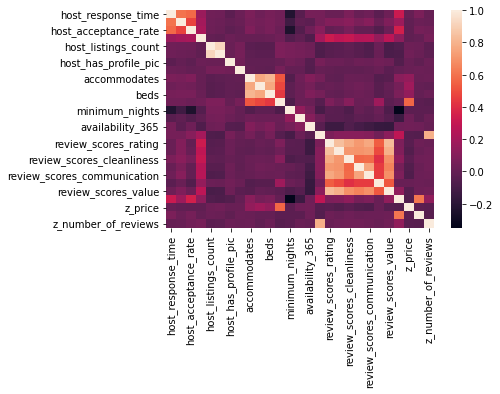

In [ ]:
#visualize possible correlations
df_cor = df_filtered.drop(['id','latitude','longitude'],axis=1).corr()
dataplot=sns.heatmap(df_cor)

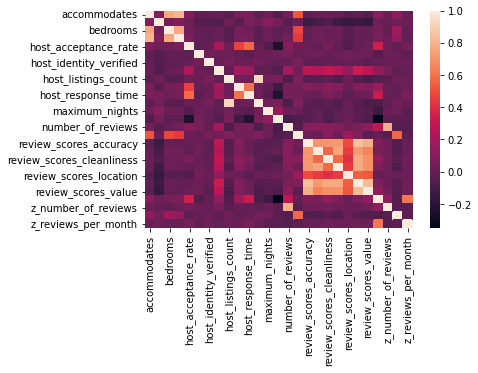

In [ ]:
df_cor = df_filtered_norm.drop(['id','latitude','longitude'],axis=1).corr()
dataplot=sns.heatmap(df_cor)

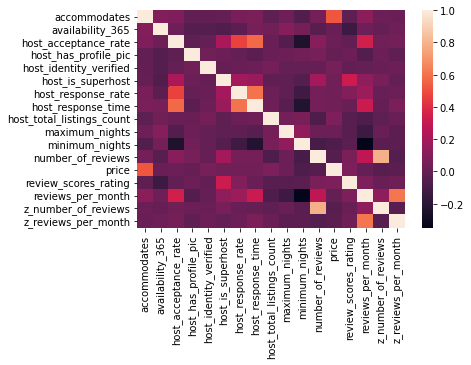

In [ ]:
df_cor_filtered = df_filtered_norm.drop(['id','latitude','longitude','bedrooms','beds','review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','z_price','host_listings_count'],axis=1).corr()
dataplot=sns.heatmap(df_cor_filtered)

In [ ]:
cor = df_cor_filtered['review_scores_rating'].sort_values(key=pd.Series.abs, ascending = True)
cor = cor[0:-1]
cor

host_acceptance_rate        -0.002986
host_identity_verified      -0.004097
accommodates                -0.013402
host_response_time           0.014598
z_number_of_reviews          0.014858
host_has_profile_pic         0.023291
z_reviews_per_month          0.025932
minimum_nights              -0.028763
maximum_nights              -0.033503
host_total_listings_count   -0.043693
number_of_reviews            0.073737
price                        0.079474
reviews_per_month            0.082297
host_response_rate           0.097272
availability_365            -0.130395
host_is_superhost            0.327561
Name: review_scores_rating, dtype: float64

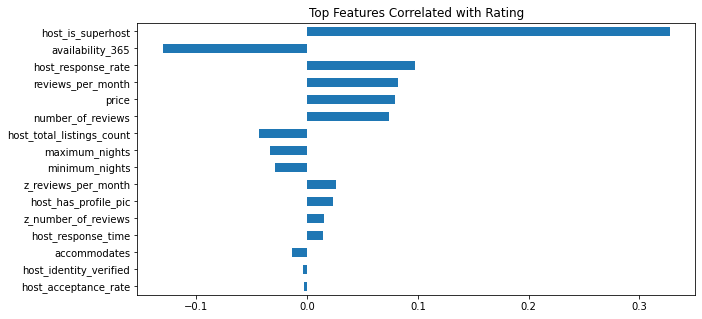

In [ ]:
cor.plot.barh(title='Top Features Correlated with Rating',figsize=(10, 5))
plt.show()

In [ ]:
df_cor_filtered['availability_365'].sort_values(key=pd.Series.abs, ascending = False)

availability_365             1.000000
review_scores_rating        -0.130395
maximum_nights               0.104444
accommodates                 0.096045
host_is_superhost           -0.065780
host_response_time           0.057466
minimum_nights               0.054847
host_identity_verified      -0.052603
host_has_profile_pic        -0.044739
host_total_listings_count    0.039452
number_of_reviews           -0.034031
reviews_per_month            0.033663
host_acceptance_rate         0.032700
z_reviews_per_month          0.031380
host_response_rate          -0.023469
price                        0.019028
z_number_of_reviews          0.007964
Name: availability_365, dtype: float64

In [ ]:
df_cor_filtered['reviews_per_month'].sort_values(key=pd.Series.abs, ascending = False)

reviews_per_month            1.000000
z_reviews_per_month          0.614352
host_acceptance_rate         0.350216
minimum_nights              -0.349631
host_response_time           0.320171
number_of_reviews            0.286690
host_response_rate           0.172788
z_number_of_reviews          0.140474
maximum_nights              -0.137114
host_is_superhost            0.134868
accommodates                 0.118375
review_scores_rating         0.082297
host_total_listings_count   -0.072034
host_has_profile_pic        -0.054635
availability_365             0.033663
host_identity_verified       0.002586
price                        0.002535
Name: reviews_per_month, dtype: float64

In [ ]:
df_cor['price'].sort_values(key=pd.Series.abs, ascending = False)

price                          1.000000
z_price                        0.566260
accommodates                   0.522466
bedrooms                       0.478765
beds                           0.436081
review_scores_location         0.179864
review_scores_cleanliness      0.104906
review_scores_rating           0.079474
host_listings_count            0.078857
host_total_listings_count      0.077693
minimum_nights                -0.074926
host_identity_verified         0.061448
number_of_reviews             -0.047350
host_response_time             0.039956
z_number_of_reviews           -0.039761
host_response_rate             0.038008
host_is_superhost              0.037512
review_scores_accuracy         0.030049
z_reviews_per_month           -0.025876
maximum_nights                 0.023624
review_scores_value           -0.022969
review_scores_communication    0.019894
host_acceptance_rate           0.019504
availability_365               0.019028
review_scores_checkin          0.016022


In [ ]:
#categorical variables will need to envode or strip for numerical values later, eg.bathrooms_text has number of bathrooms but 
df_dummies = df_filtered.select_dtypes(include=['object']).columns
df_dummies

Index(['host_verifications', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability', 'instant_bookable'],
      dtype='object')

## Correlations Scatterplot

In [ ]:
from scipy.stats import linregress, pearsonr, spearmanr
%pylab inline 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


slope 0.20262470888285591
intercept 4.541511584996561


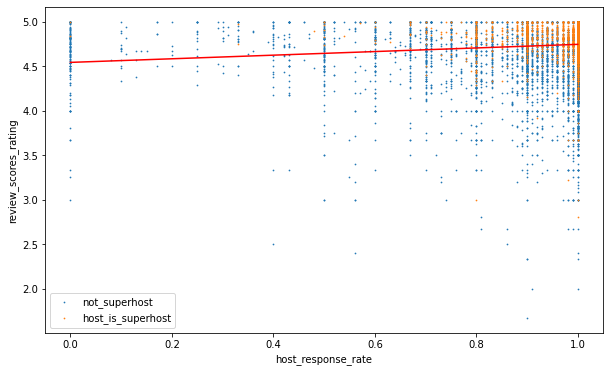

In [ ]:
fig = plt.figure(figsize = (10,6))#,dpi = 200
plt.scatter(df_filtered['host_response_rate'][df_filtered['host_is_superhost'] == 0], df_filtered['review_scores_rating'][df_filtered['host_is_superhost'] == 0], s = 0.5)
plt.scatter(df_filtered['host_response_rate'][df_filtered['host_is_superhost'] == 1], df_filtered['review_scores_rating'][df_filtered['host_is_superhost'] == 1], s = 0.5)
plt.xlabel('host_response_rate')
plt.ylabel('review_scores_rating')
#plt.yscale('log')
plt.legend(['not_superhost', 'host_is_superhost'])

X = df_filtered['host_response_rate']
Y = df_filtered['review_scores_rating']
slope, intercept, _, _, _ = linregress(X, Y)
print("slope", slope)
print("intercept", intercept)

plt.plot([X.min(), 
          X.max()], 
         [X.min() * slope + intercept, 
          X.max() * slope + intercept], 
         color='red', 
         label='linear regression fit')

slope 1.9429597773402858
intercept -0.061900135724312966


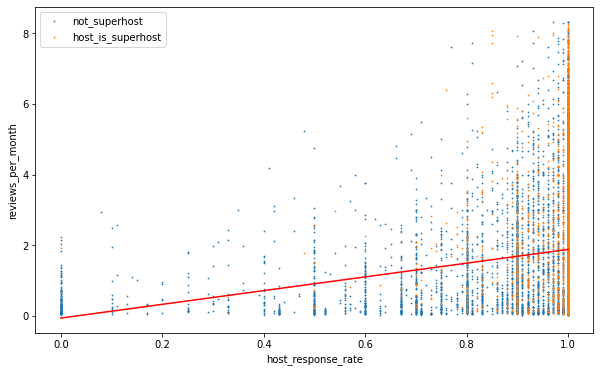

In [ ]:
fig = plt.figure(figsize = (10,6))#,dpi = 200
plt.scatter(df_filtered['host_response_rate'][df_filtered['host_is_superhost'] == 0], df_filtered['reviews_per_month'][df_filtered['host_is_superhost'] == 0], s = 0.5)
plt.scatter(df_filtered['host_response_rate'][df_filtered['host_is_superhost'] == 1], df_filtered['reviews_per_month'][df_filtered['host_is_superhost'] == 1], s = 0.5)
plt.xlabel('host_response_rate')
plt.ylabel('reviews_per_month')
#plt.yscale('log')
plt.legend(['not_superhost', 'host_is_superhost'])

X = df_filtered['host_response_rate']
Y = df_filtered['reviews_per_month']
slope, intercept, _, _, _ = linregress(X, Y)
print("slope", slope)
print("intercept", intercept)

plt.plot([X.min(), 
          X.max()], 
         [X.min() * slope + intercept, 
          X.max() * slope + intercept], 
         color='red', 
         label='linear regression fit')



slope -0.00030083658711396044
intercept 4.788454155287153


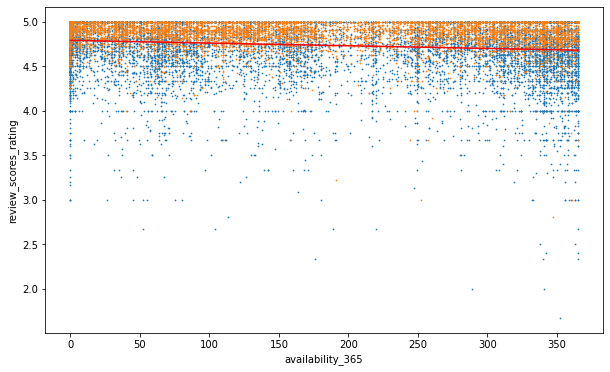

In [ ]:
fig = plt.figure(figsize = (10,6)) #,dpi = 200
plt.scatter(df_filtered['availability_365'][df_filtered['host_is_superhost'] == 0], df_filtered['review_scores_rating'][df_filtered['host_is_superhost'] == 0], s = 0.5)
plt.scatter(df_filtered['availability_365'][df_filtered['host_is_superhost'] == 1], df_filtered['review_scores_rating'][df_filtered['host_is_superhost'] == 1], s = 0.5)
plt.xlabel('availability_365')
plt.ylabel('review_scores_rating')
#plt.yscale('log')

X = df_filtered['availability_365']
Y = df_filtered['review_scores_rating']
slope, intercept, _, _, _ = linregress(X, Y)
print("slope", slope)
print("intercept", intercept)

plt.plot([X.min(), 
          X.max()], 
         [X.min() * slope + intercept, 
          X.max() * slope + intercept], 
         color='red', 
         label='linear regression fit')

slope 0.000174023231102559
intercept 4.702985749706264


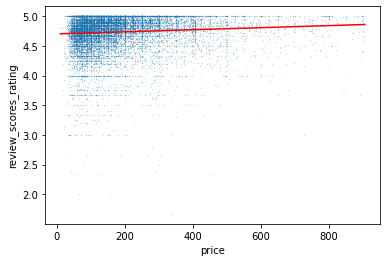

In [ ]:
plt.scatter(df_filtered['price'], df_filtered['review_scores_rating'], s = 0.01)
plt.xlabel('price')
plt.ylabel('review_scores_rating')
#plt.yscale('log')

X = df_filtered['price']
slope, intercept, _, _, _ = linregress(X, df_filtered['review_scores_rating'])
print("slope", slope)
print("intercept", intercept)

plt.plot([X.min(), 
          X.max()], 
         [X.min() * slope + intercept, 
          X.max() * slope + intercept], 
         color='red', 
         label='linear regression fit')

##Does location impact ratings?

In [ ]:
#https://plotly.com/python/scattermapbox/

In [ ]:
#new df cols for plotly
df_filtered['review_scores_rating_std'] = df_filtered_norm['review_scores_rating']
df_filtered_norm['dummy_column_for_size'] = 1

<ipython-input-45-14d23dcd05e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['review_scores_rating_std'] = df_filtered_norm['review_scores_rating']


In [ ]:
# set up plotly
import plotly.express as px
lat = np.mean(df_filtered['latitude'])
lon = np.mean(df_filtered['longitude'])

### a) Borough-Level Location Doesn’t Determine Ratings
(which part of the city the Airbnb is in)

In [ ]:
#review_scores_rating
fig = px.scatter_mapbox(df_filtered, 
                        lat="latitude", lon="longitude", 
                        color = 'review_scores_rating',
                        size='review_scores_rating',  
                        size_max = 3,
                        zoom=9.5, 
                        mapbox_style="carto-positron", 
                        opacity = 1, 
                        center=dict(lat = lat, lon = lon))
fig.show()

In [ ]:
#df_filtered['review_scores_rating'] > 4
fig = px.scatter_mapbox(df_filtered[df_filtered['review_scores_rating'] > 4], 
lat="latitude", lon="longitude", 
                        color = 'review_scores_rating',
                        size='review_scores_rating',  
                        size_max = 2,
                        zoom=10, 
                        mapbox_style="carto-positron", 
                        opacity = 1, 
                        center=dict(lat = lat, lon = lon))
fig.show()

**Boroughs' Rating Mean**

In [ ]:
df_filtered.groupby(['neighbourhood_group_cleansed'])['review_scores_rating'].agg(['median'])

median
neighbourhood_group_cleansed        
Bronx                          4.800
Brooklyn                       4.825
Manhattan                      4.800
Queens                         4.800
Staten Island                  4.830

**Boroughs' percentage of 5 stars 4.5+ stars**

In [ ]:
df_filtered[df_filtered['review_scores_rating'] == 5].groupby(['neighbourhood_group_cleansed'])['price','number_of_reviews', 'review_scores_rating'].agg(['count', 'mean','median'])

<ipython-input-50-43a20c8e6307>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



price                    number_of_reviews  \
                             count        mean median             count   
neighbourhood_group_cleansed                                              
Bronx                          143  130.503497  105.0               143   
Brooklyn                      1080  201.242593  166.5              1080   
Manhattan                      916  245.531659  200.0               916   
Queens                         510  140.178431  108.5               510   
Staten Island                   45  105.266667  106.0                45   

                                               review_scores_rating       \
                                   mean median                count mean   
neighbourhood_group_cleansed                                               
Bronx                          9.356643    6.0                  143  5.0   
Brooklyn                      10.955556    6.0                 1080  5.0   
Manhattan                      9.355895    6.0                  916  5.0   
Queens                        10.482353    6.0                  510  5.0   
Staten Island                 11.400000    8.0                   45  5.0   

                                     
                             median  
neighbourhood_group_cleansed         
Bronx                           5.0  
Brooklyn                        5.0  
Manhattan                       5.0  
Queens                          5.0  
Staten Island                   5.0

In [ ]:
df_filtered[df_filtered['review_scores_rating'] > 4.5].groupby(['neighbourhood_group_cleansed'])['price','number_of_reviews', 'review_scores_rating'].agg(['count', 'mean','median'])

<ipython-input-51-3381d75c3df8>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



price                    number_of_reviews  \
                             count        mean median             count   
neighbourhood_group_cleansed                                              
Bronx                          693  117.467532   95.0               693   
Brooklyn                      5071  174.624532  145.0              5071   
Manhattan                     4130  230.534625  187.0              4130   
Queens                        2487  134.186168  102.0              2487   
Staten Island                  233  129.223176  108.0               233   

                                               review_scores_rating            \
                                   mean median                count      mean   
neighbourhood_group_cleansed                                                    
Bronx                         41.516595   23.0                  693  4.830491   
Brooklyn                      48.235457   27.0                 5071  4.840290   
Manhattan                     43.570944   23.0                 4130  4.834993   
Queens                        43.784077   25.0                 2487  4.827089   
Staten Island                 47.184549   28.0                  233  4.832060   

                                     
                             median  
neighbourhood_group_cleansed         
Bronx                          4.84  
Brooklyn                       4.86  
Manhattan                      4.85  
Queens                         4.84  
Staten Island                  4.85

In [ ]:
# percentage of 5 stars
print('Bronx', 135/848)
print('Brooklyn', 1000/5659)
print('Manhattan', 840/5195)
print('Queens', 449/2859)
print('Staten Island', 41/275)

Bronx 0.15919811320754718
Brooklyn 0.17670966601873123
Manhattan 0.1616939364773821
Queens 0.15704791885274572
Staten Island 0.14909090909090908


In [ ]:
# percentage of 4.5+ stars
print('Bronx', 805/1000)
print('Brooklyn', 6106/7217)
print('Manhattan', 5298/6722)
print('Queens', 2957/3663)
print('Staten Island', 265/313)

Bronx 0.805
Brooklyn 0.8460579188028267
Manhattan 0.788158286224338
Queens 0.8072618072618073
Staten Island 0.8466453674121406


### b) Neighbourhoods Do Impact Ratings

In [ ]:
#filter top 5
lst_nei = ['Bath Beach','Roosevelt Island','Cobble Hill','Morris Park','Park Slope']
 #'Williamsbridge',	'Midtown', 'Theater District','Mount Hope','Port Morris'

In [ ]:
fig = px.scatter_mapbox(df_filtered[df_filtered['neighbourhood_cleansed'].isin(lst_nei)], 
lat="latitude", lon="longitude", 
                        color = 'review_scores_rating',
                        size='review_scores_rating',  
                        size_max = 3,
                        zoom=9.5, 
                        mapbox_style="carto-positron", 
                        opacity = 1, 
                        center=dict(lat = lat, lon = lon))
fig.show()

In [ ]:
df_location = df_filtered.groupby(['neighbourhood_cleansed'])[ 'review_scores_rating'].agg(['count', 'median'])
df_location = df_location.reset_index()
df_location = df_location[df_location['count']>15].sort_values(by = 'median', ascending=False)
df_location

neighbourhood_cleansed  count  median
5               Bath Beach     18   4.985
183       Roosevelt Island     16   4.955
45             Cobble Hill     17   4.930
142            Morris Park     17   4.930
161             Park Slope    112   4.910
..                     ...    ...     ...
227         Williamsbridge     38   4.700
137                Midtown    377   4.690
204       Theater District     65   4.670
146             Mount Hope     24   4.595
167            Port Morris     24   4.520

[125 rows x 3 columns]

### c) Appendix: review number ~ location

In [ ]:
#reviews_per_month
fig = px.scatter_mapbox(df_filtered, 
                        lat="latitude", lon="longitude", 
                        color="reviews_per_month", 
                        size='reviews_per_month',  
                        size_max = 4,
                        zoom=9.5, 
                        mapbox_style="carto-positron", 
                        opacity = 1, 
                        #color_continuous_scale=px.colors.sequential.Bluered,
                        center=dict(lat = lat, lon = lon))
fig.show()

In [ ]:
df_filtered.groupby(['neighbourhood_group_cleansed'])['price','number_of_reviews','review_scores_rating'].agg(['count', 'mean','median'])

<ipython-input-58-2fadb713f572>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



price                    number_of_reviews  \
                             count        mean median             count   
neighbourhood_group_cleansed                                              
Bronx                          853  114.763189   92.0               853   
Brooklyn                      5898  168.773483  139.0              5898   
Manhattan                     5119  229.669271  182.0              5119   
Queens                        2979  133.178248  100.0              2979   
Staten Island                  275  127.963636  105.0               275   

                                               review_scores_rating            \
                                   mean median                count      mean   
neighbourhood_group_cleansed                                                    
Bronx                         37.858148   19.0                  853  4.717081   
Brooklyn                      45.149881   24.0                 5898  4.756880   
Manhattan                     40.375464   20.0                 5119  4.713854   
Queens                        40.819067   22.0                 2979  4.728496   
Staten Island                 43.338182   24.0                  275  4.733891   

                                     
                             median  
neighbourhood_group_cleansed         
Bronx                         4.800  
Brooklyn                      4.825  
Manhattan                     4.800  
Queens                        4.800  
Staten Island                 4.830

## Wordcloud of Amentities

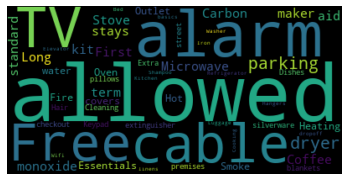

In [ ]:
#word cloud to find most common ammenities
df_filtered['amenities']
#Test word cloud with one row first
text = df_filtered.amenities[0]
text
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#word cloud of amenities for all texts in amenities
all_texts = " ".join(text for text in df_filtered.amenities)
print('length of total amanities text',len(all_texts))

length of total amanities text 8342900


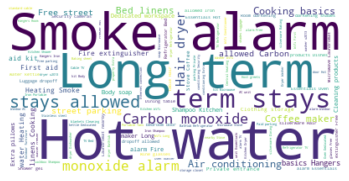

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_texts)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



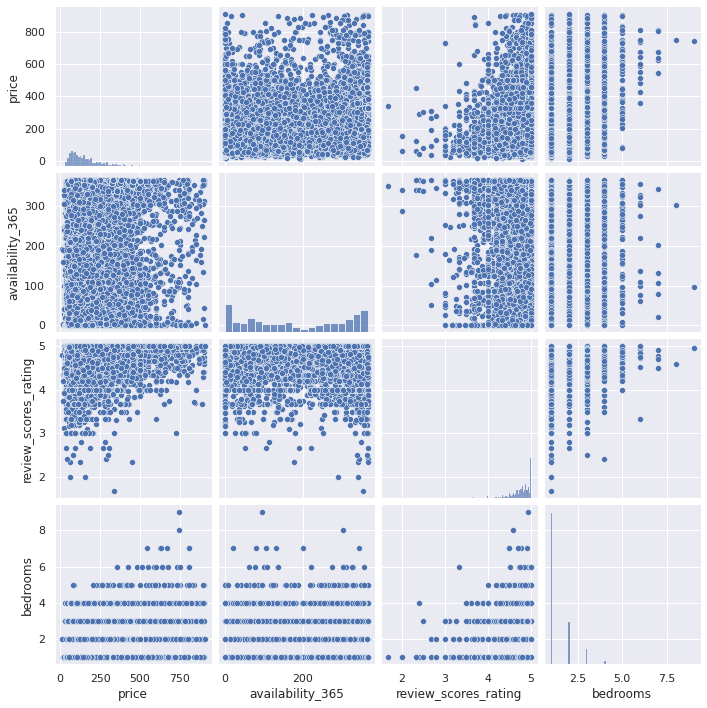

In [ ]:
sns.set()
cols = ['price', 'availability_365','review_scores_rating','amenities','bedrooms','property_type','room_type']
sns.pairplot(df_filtered[cols], size = 2.5)
plt.show();

## Amentities Recoding

In [ ]:
df_Amenities_Review=df_filtered[['amenities','review_scores_rating']]
df_Amenities_Review

amenities  review_scores_rating
0      ["First aid kit", "Microwave", "Stove", "Coffe...                  4.89
3      ["Hair dryer", "Essentials", "Carbon monoxide ...                  4.42
6      ["First aid kit", "Coffee maker", "Gym", "Long...                  4.90
8      ["Essentials", "Oven", "Cable TV", "Refrigerat...                  4.34
9      ["Coffee maker", "Gym", "Long term stays allow...                  5.00
...                                                  ...                   ...
39871  ["Microwave", "Coffee maker", "Smart lock", "L...                  5.00
39873  ["Essentials", "Lock on bedroom door", "Heatin...                  5.00
39876  ["First aid kit", "Microwave", "Stove", "Coffe...                  4.91
39877  ["First aid kit", "Microwave", "Laundromat nea...                  4.79
39878  ["Hair dryer", "First aid kit", "Essentials", ...                  4.45

[15124 rows x 2 columns]

In [ ]:
df_Amenities_Review['amenities'].str.split(',',expand=True)

0                        1                           2   \
0      ["First aid kit"              "Microwave"                     "Stove"   
3         ["Hair dryer"             "Essentials"     "Carbon monoxide alarm"   
6      ["First aid kit"           "Coffee maker"                       "Gym"   
8         ["Essentials"                   "Oven"                  "Cable TV"   
9       ["Coffee maker"                    "Gym"   "Long term stays allowed"   
...                 ...                      ...                         ...   
39871      ["Microwave"           "Coffee maker"                "Smart lock"   
39873     ["Essentials"   "Lock on bedroom door"                   "Heating"   
39876  ["First aid kit"              "Microwave"                     "Stove"   
39877  ["First aid kit"              "Microwave"         "Laundromat nearby"   
39878     ["Hair dryer"          "First aid kit"                "Essentials"   

                               3                           4   \
0                  "Coffee maker"   "Long term stays allowed"   
3                          "Iron"                  "Backyard"   
6       "Long term stays allowed"     "Carbon monoxide alarm"   
8                  "Refrigerator"                 "Microwave"   
9         "Carbon monoxide alarm"    "TV with standard cable"   
...                           ...                         ...   
39871   "Long term stays allowed"     "Carbon monoxide alarm"   
39873               "Smoke alarm"         "Fire extinguisher"   
39876              "Coffee maker"     "Carbon monoxide alarm"   
39877              "Coffee maker"   "Long term stays allowed"   
39878                      "Iron"                 "Hot water"   

                              5                          6   \
0        "Carbon monoxide alarm"   "TV with standard cable"   
3                     "Cable TV"             "Refrigerator"   
6       "TV with standard cable"               "Essentials"   
8                    "Hot water"                  "Heating"   
9                   "Essentials"      "Dedicated workspace"   
...                          ...                        ...   
39871               "Essentials"                  "Toaster"   
39873                       "TV"                  "Kitchen"   
39876               "Essentials"                     "Oven"   
39877    "Carbon monoxide alarm"           "Window AC unit"   
39878                  "Heating"                  "Shampoo"   

                           7                        8   \
0                "Essentials"                   "Oven"   
3                 "Hot water"                "Heating"   
6       "Dedicated workspace"         "Building staff"   
8                   "Kitchen"                  "Stove"   
9            "Building staff"              "Hot water"   
...                       ...                      ...   
39871               "Freezer"   "Lock on bedroom door"   
39873      "Indoor fireplace"       "Private entrance"   
39876             "Hot water"                "Heating"   
39877            "Essentials"    "Dedicated workspace"   
39878           "Smoke alarm"                     "TV"   

                            9   ...    77    78    79    80    81    82    83  \
0                  "Hot water"  ...  None  None  None  None  None  None  None   
3                "Smoke alarm"  ...  None  None  None  None  None  None  None   
6                  "Hot water"  ...  None  None  None  None  None  None  None   
8             "Cooking basics"  ...  None  None  None  None  None  None  None   
9                    "Heating"  ...  None  None  None  None  None  None  None   
...                        ...  ...   ...   ...   ...   ...   ...   ...   ...   
39871              "Hot water"  ...  None  None  None  None  None  None  None   
39873                "Hangers"  ...  None  None  None  None  None  None  None   
39876            "Smoke alarm"  ...  None  None  None  None  None  None  None   
39877   "Stainl

In [ ]:
#Using string split, set the facility to 1 if it is available and 0 if it is not.
Amenity_Hotwater = df_Amenities_Review.amenities.str.find("Hot water")
df_Amenity_Hotwater = pd.DataFrame(Amenity_Hotwater)
df_Amenity_Hotwater.loc[df_Amenity_Hotwater.amenities>0,'Hotwater']=int(1)
df_Amenity_Hotwater = df_Amenity_Hotwater.drop(['amenities'], axis=1)
df_Amenity_Hotwater['Hotwater'].fillna(int(0),inplace=True)

Smoke_alarm = df_Amenities_Review.amenities.str.find("Smoke alarm")
df_Smoke_alarm = pd.DataFrame(Smoke_alarm)
df_Smoke_alarm.loc[df_Smoke_alarm.amenities>0,'Smoke_alarm']=1
df_Smoke_alarm = df_Smoke_alarm.drop(['amenities'], axis=1)
df_Smoke_alarm['Smoke_alarm'].fillna(0,inplace=True)

Microwave = df_Amenities_Review.amenities.str.find("Microwave")
df_Microwave = pd.DataFrame(Microwave)
df_Microwave.loc[df_Microwave.amenities>0,'Microwave']=1
df_Microwave = df_Microwave.drop(['amenities'], axis=1)
df_Microwave['Microwave'].fillna(0,inplace=True)

Hair_dryer = df_Amenities_Review.amenities.str.find("Hair dryer")
df_Hair_dryer = pd.DataFrame(Hair_dryer)
df_Hair_dryer.loc[df_Hair_dryer.amenities>0,'Hair_dryer']=1
df_Hair_dryer = df_Hair_dryer.drop(['amenities'], axis=1)
df_Hair_dryer['Hair_dryer'].fillna(0,inplace=True)

Air_conditioning = df_Amenities_Review.amenities.str.find("Air conditioning")
df_Air_conditioning = pd.DataFrame(Air_conditioning)
df_Air_conditioning.loc[df_Air_conditioning.amenities>0,'Air_conditioning']=1
df_Air_conditioning = df_Air_conditioning.drop(['amenities'], axis=1)

Carbon_monoxide = df_Amenities_Review.amenities.str.find("Carbon monoxide")
df_Carbon_monoxide = pd.DataFrame(Carbon_monoxide)
df_Carbon_monoxide.loc[df_Carbon_monoxide.amenities>0,'Carbon_monoxide']=1
df_Carbon_monoxide = df_Carbon_monoxide.drop(['amenities'], axis=1)
df_Carbon_monoxide['Carbon_monoxide'].fillna(0,inplace=True)

Essentials = df_Amenities_Review.amenities.str.find("Essentials")
df_Essentials = pd.DataFrame(Essentials)
df_Essentials.loc[df_Essentials.amenities>0,'Essentials']=1
df_Essentials = df_Essentials.drop(['amenities'], axis=1)
df_Essentials['Essentials'].fillna(0,inplace=True)

Parking= df_Amenities_Review.amenities.str.find("Free street parking")
df_Parking= pd.DataFrame(Parking)
df_Parking.loc[df_Parking.amenities>0,'Free street parking']=1
df_Parking= df_Parking.drop(['amenities'], axis=1)
df_Parking['Free street parking'].fillna(0,inplace=True)

Coffee_maker = df_Amenities_Review.amenities.str.find("Coffee maker")
df_Coffee_maker= pd.DataFrame(Coffee_maker)
df_Coffee_maker.loc[df_Coffee_maker.amenities>0,'Coffee_maker']=1
df_Coffee_maker= df_Coffee_maker.drop(['amenities'], axis=1)
df_Coffee_maker['Coffee_maker'].fillna(0,inplace=True)

Oven = df_Amenities_Review.amenities.str.find("Oven")
df_Oven = pd.DataFrame(Oven)
df_Oven.loc[df_Oven.amenities>0,'Oven']=1
df_Oven = df_Oven.drop(['amenities'], axis=1)
df_Oven['Oven'].fillna(0,inplace=True)

Wifi= df_Amenities_Review.amenities.str.find("Wifi")
df_Wifi= pd.DataFrame(Wifi)
df_Wifi.loc[df_Wifi.amenities>0,'Wifi']=1
df_Wifi= df_Wifi.drop(['amenities'], axis=1)
df_Wifi['Wifi'].fillna(0,inplace=True)

Gym= df_Amenities_Review.amenities.str.find("Gym")
df_Gym= pd.DataFrame(Gym)
df_Gym.loc[df_Gym.amenities>0,'Gym']=1
df_Gym= df_Gym.drop(['amenities'], axis=1)
df_Gym['Gym'].fillna(0,inplace=True)

Heating= df_Amenities_Review.amenities.str.find("Heating")
df_Heating= pd.DataFrame(Heating)
df_Heating.loc[df_Heating.amenities>0,'Heating']=1
df_Heating= df_Heating.drop(['amenities'], axis=1)
df_Heating['Heating'].fillna(0,inplace=True)

Air_conditioning = df_Amenities_Review.amenities.str.find("Air conditioning")
df_Air_conditioning = pd.DataFrame(Air_conditioning)
df_Air_conditioning.loc[df_Air_conditioning.amenities>0,'Air_conditioning']=1
df_Air_conditioning = df_Air_conditioning.drop(['amenities'], axis=1)
df_Air_conditioning['Air_conditioning'].fillna(0,inplace=True)

In [ ]:
#Merge facilities and review score ratings to form a new dataframe
df_Amenities_Review=pd.concat([df_Amenities_Review,df_Amenity_Hotwater,df_Smoke_alarm,df_Microwave,df_Hair_dryer,df_Air_conditioning,df_Carbon_monoxide,df_Essentials,df_Parking,df_Oven,df_Coffee_maker,df_Heating,df_Gym,df_Wifi],axis=1)
df_Amenities_Review = df_Amenities_Review.drop(['amenities'], axis=1)
df_Amenities_Review

review_scores_rating  Hotwater  Smoke_alarm  Microwave  Hair_dryer  \
0                      4.89       1.0          1.0        1.0         1.0   
3                      4.42       1.0          1.0        0.0         1.0   
6                      4.90       1.0          1.0        0.0         1.0   
8                      4.34       1.0          0.0        1.0         0.0   
9                      5.00       1.0          1.0        0.0         1.0   
...                     ...       ...          ...        ...         ...   
39871                  5.00       1.0          1.0        1.0         0.0   
39873                  5.00       0.0          1.0        0.0         0.0   
39876                  4.91       1.0          1.0        1.0         1.0   
39877                  4.79       1.0          1.0        1.0         1.0   
39878                  4.45       1.0          1.0        0.0         1.0   

       Air_conditioning  Carbon_monoxide  Essentials  Free street parking  \
0                   0.0              1.0         1.0                  1.0   
3                   1.0              1.0         1.0                  1.0   
6                   1.0              1.0         1.0                  0.0   
8                   1.0              0.0         1.0                  0.0   
9                   1.0              1.0         1.0                  0.0   
...                 ...              ...         ...                  ...   
39871               0.0              1.0         1.0                  0.0   
39873               1.0              1.0         1.0                  0.0   
39876               1.0              1.0         1.0                  1.0   
39877               0.0              1.0         1.0                  0.0   
39878               0.0              1.0         1.0                  0.0   

       Oven  Coffee_maker  Heating  Gym  Wifi  
0       1.0           1.0      1.0  0.0   1.0  
3       0.0           1.0      1.0  0.0   1.0  
6       0.0           1.0      1.0  1.0   1.0  
8       1.0           1.0      1.0  0.0   1.0  
9       0.0           1.0      1.0  1.0   1.0  
...     ...           ...      ...  ...   ...  
39871   0.0           1.0      1.0  0.0   1.0  
39873   0.0           0.0      1.0  0.0   1.0  
39876   1.0           1.0      1.0  0.0   1.0  
39877   0.0           1.0      1.0  0.0   1.0  
39878   0.0           0.0      1.0  0.0   1.0  

[15124 rows x 14 columns]

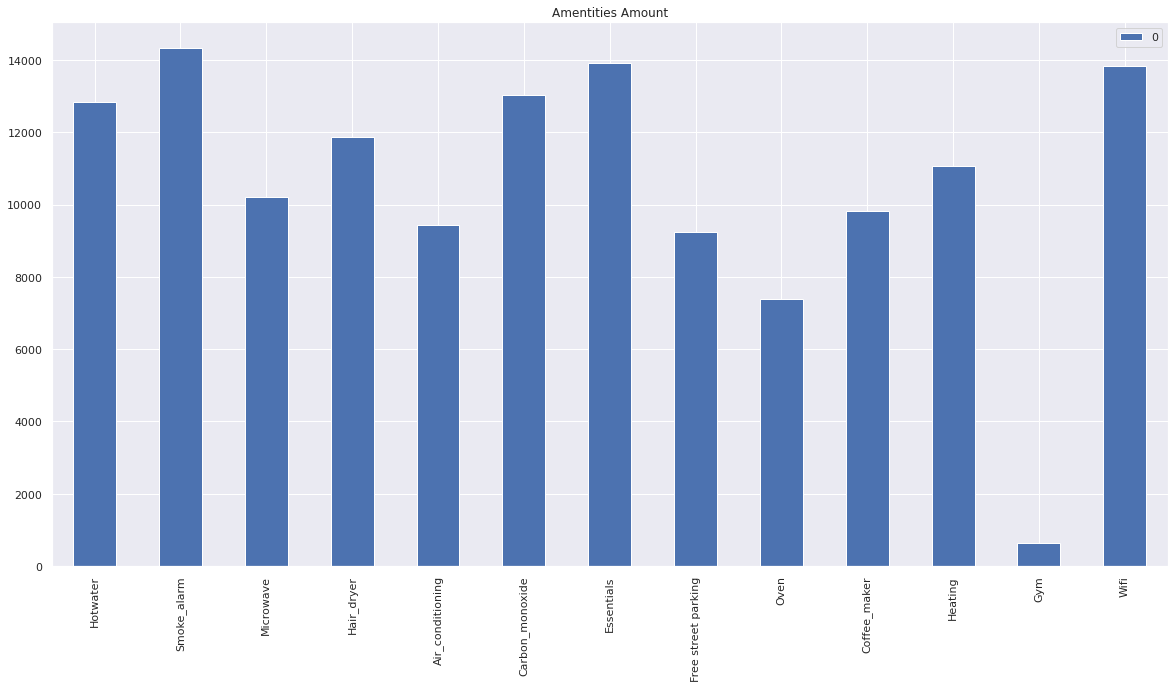

In [ ]:
#Plot sum of the Amenity Amount
df_Amentity = df_Amenities_Review.drop(['review_scores_rating'], axis=1)
df_Amentity= pd.DataFrame(df_Amentity.sum())
df_Amentity.plot(kind='bar', title='Amentities Amount',figsize=(20, 10))
plt.show()

## Using the Coefficient of Model to find Correlation between Amentities and Review Score Rating

Rigid Regression（Not Work)

The dependent variable Y(review_scores_rating)is required to be a continuous variable

(MSE too low)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [ ]:
y = df_Amenities_Review['review_scores_rating'].values
data = df_Amenities_Review.drop(['review_scores_rating'], axis = 1)
x = data.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12099, 13)
(3025, 13)
(12099,)
(3025,)


In [ ]:
regressor = Ridge(alpha = 2, normalize = True, fit_intercept = True)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



Ridge(alpha=2, normalize=True)

In [ ]:
# The mathematical expressions obtained
print('mathematical expressions：\n Charges = ', end='')
columns = data.columns
coefs = regressor.coef_
for i in range(len(columns)):
    print('%s * %.2f + ' %(columns[i], coefs[i]), end='')
print(regressor.intercept_)

mathematical expressions：
 Charges = Hotwater * 0.01 + Smoke_alarm * 0.02 + Microwave * 0.01 + Hair_dryer * 0.02 + Air_conditioning * -0.01 + Carbon_monoxide * 0.00 + Essentials * 0.02 + Free street parking * 0.01 + Oven * 0.01 + Coffee_maker * 0.03 + Heating * -0.01 + Gym * -0.01 + Wifi * -0.02 + 4.65904772917143


In [ ]:
# Compute and print the coefficients
print(coefs)

[ 0.01469262  0.01913445  0.01287159  0.0216594  -0.00947213  0.00483371
  0.01941561  0.01356184  0.00938852  0.02637659 -0.00802187 -0.0130551
 -0.02232772]


In [ ]:
# Get the MSE of the Model
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(x_test)
mse_score = mean_squared_error(y_test, y_pred)
print('alpha=2，Model MSE is：' , format(mse_score, ','))

alpha=2，Model MSE is： 0.08128052737279755


Logistic regression

Transfer the dependent variable Y(review_scores_rating) from a continuous variable to a ccategorical variables

(Test Score 57%)

In [ ]:
df_Amenities_Review['review_scores_rating'] = np.where(df_Amenities_Review['review_scores_rating']>=4.8, 1, 0)
df_Amenities_Review

review_scores_rating  Hotwater  Smoke_alarm  Microwave  Hair_dryer  \
0                         1       1.0          1.0        1.0         1.0   
3                         0       1.0          1.0        0.0         1.0   
6                         1       1.0          1.0        0.0         1.0   
8                         0       1.0          0.0        1.0         0.0   
9                         1       1.0          1.0        0.0         1.0   
...                     ...       ...          ...        ...         ...   
39871                     1       1.0          1.0        1.0         0.0   
39873                     1       0.0          1.0        0.0         0.0   
39876                     1       1.0          1.0        1.0         1.0   
39877                     0       1.0          1.0        1.0         1.0   
39878                     0       1.0          1.0        0.0         1.0   

       Air_conditioning  Carbon_monoxide  Essentials  Free street parking  \
0                   0.0              1.0         1.0                  1.0   
3                   1.0              1.0         1.0                  1.0   
6                   1.0              1.0         1.0                  0.0   
8                   1.0              0.0         1.0                  0.0   
9                   1.0              1.0         1.0                  0.0   
...                 ...              ...         ...                  ...   
39871               0.0              1.0         1.0                  0.0   
39873               1.0              1.0         1.0                  0.0   
39876               1.0              1.0         1.0                  1.0   
39877               0.0              1.0         1.0                  0.0   
39878               0.0              1.0         1.0                  0.0   

       Oven  Coffee_maker  Heating  Gym  Wifi  
0       1.0           1.0      1.0  0.0   1.0  
3       0.0           1.0      1.0  0.0   1.0  
6       0.0           1.0      1.0  1.0   1.0  
8       1.0           1.0      1.0  0.0   1.0  
9       0.0           1.0      1.0  1.0   1.0  
...     ...           ...      ...  ...   ...  
39871   0.0           1.0      1.0  0.0   1.0  
39873   0.0           0.0      1.0  0.0   1.0  
39876   1.0           1.0      1.0  0.0   1.0  
39877   0.0           1.0      1.0  0.0   1.0  
39878   0.0           0.0      1.0  0.0   1.0  

[15124 rows x 14 columns]

In [ ]:
y = df_Amenities_Review['review_scores_rating'].values
data = df_Amenities_Review.drop(['review_scores_rating'], axis = 1)
x = data.values

In [ ]:
# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=500) 
# LOGISTIC REGRESSOR
from sklearn.linear_model import LogisticRegressionCV
log = LogisticRegressionCV(max_iter =1000)

In [ ]:
# Fit the regressor to the data
log.fit(x_train, y_train)

LogisticRegressionCV(max_iter=1000)

In [ ]:
# Compute and print the coefficients
print(log.coef_)

[[ 0.05280029  0.29858624  0.0074524   0.34257934 -0.12423565 -0.01782155
   0.07224645 -0.01943749  0.07948535  0.42749094 -0.29162643 -0.05988777
  -0.5002409 ]]


In [ ]:
log.score(x_test, y_test)

0.5785123966942148

Text(0.5, 1.0, 'Probability of Amenity Adding Value to Airbnb Listing')

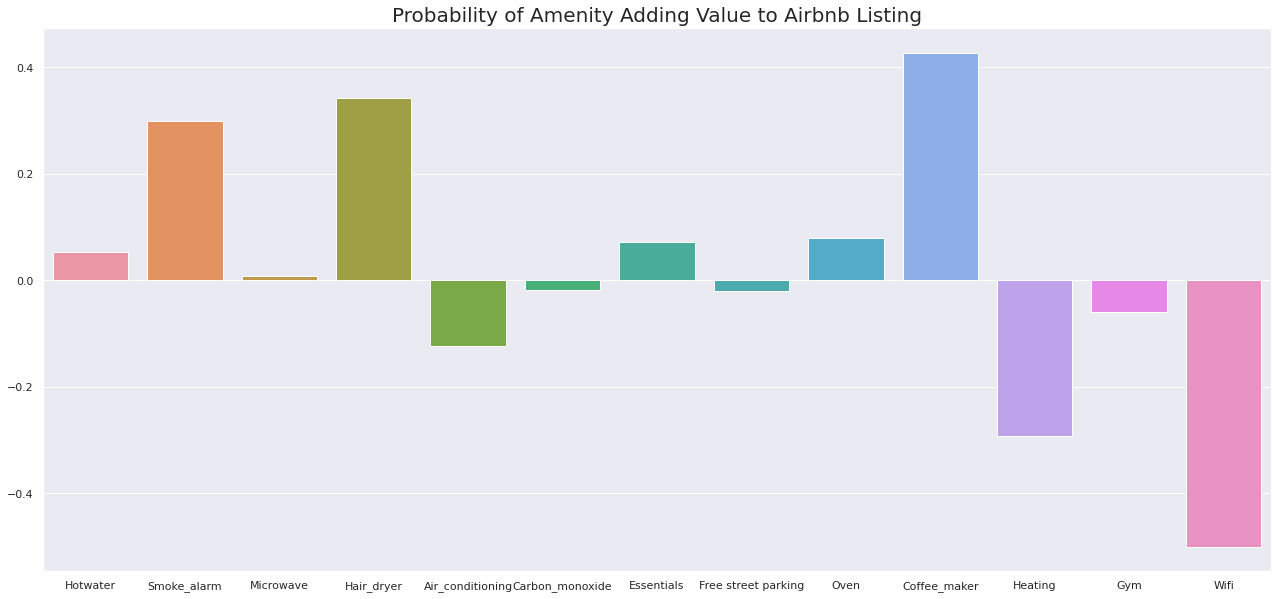

In [ ]:
##Plot the  coefficients to express the Probability of Amenity Adding Value to Airbnb Listing
df_columns = data.columns
df_coef = pd.DataFrame(log.coef_, columns=df_columns)
sns.set(rc = {'figure.figsize':(22,10)})
sns.barplot (data=df_coef).set_title('Probability of Amenity Adding Value to Airbnb Listing',fontsize=20)

Text(0.5, 1.0, 'Contrast between Percentage and Coefficient of Amentity ')

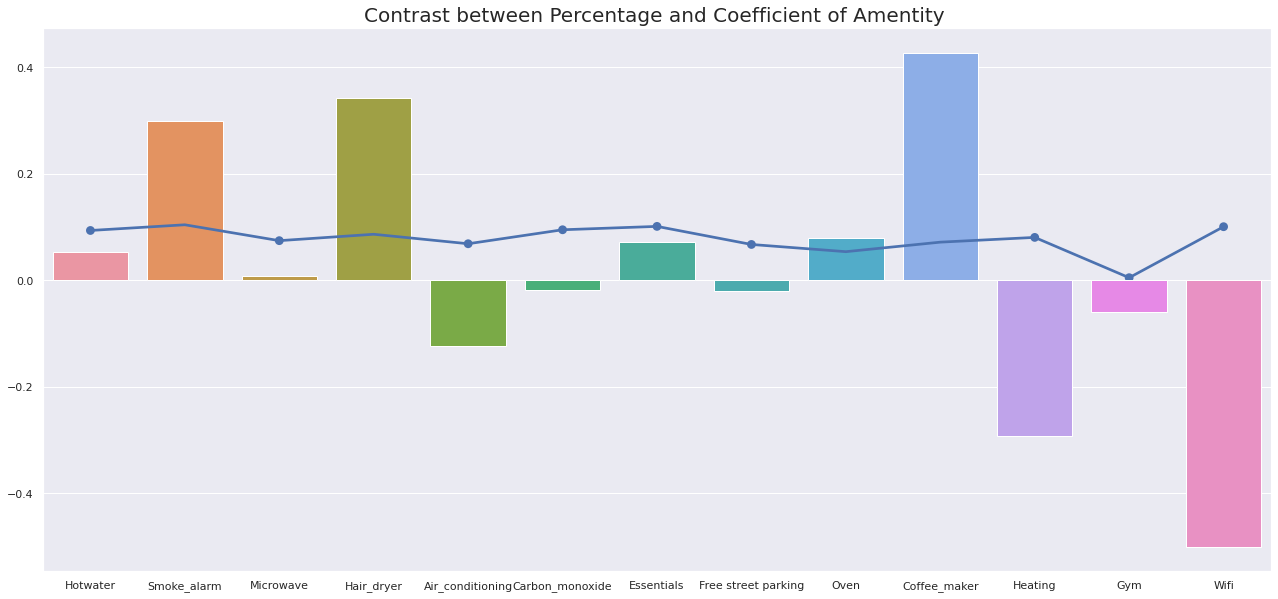

In [ ]:
##Calculate the percentage of the total number of each facility
df_Amentity_sum=df_Amentity.transpose()
df_Amentity_ratio=df_Amentity_sum.div(df_Amentity_sum.sum(axis=1),axis=0)
##Plot the Contrast between Percentage and Coefficient of Amentity
sns.set(rc = {'figure.figsize':(22,10)})
sns.pointplot(data=df_Amentity_ratio)
sns.barplot (data=df_coef).set_title('Contrast between Percentage and Coefficient of Amentity ',fontsize=20)

##Sentiment analysis on review commnets


*   What was the distribution of comments?
*   What was the most positive and negative commnet?
*   What words were said the most in the positive, negative and neutral comments?
*   Do users write about the amenities? (coffee maker?)








In [ ]:
import seaborn as sns
%matplotlib inline
#read reviews as dataframe
df_review = pd.read_csv('/content/gdrive/MyDrive/INFO Urban Data_HW/Urban Data Final Project/data/Review_listing_full_data/reviews.csv')
#show df_review info
df_review.info()
#show df_review head
df_review.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064458 entries, 0 to 1064457
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1064458 non-null  int64 
 1   id             1064458 non-null  int64 
 2   date           1064458 non-null  object
 3   reviewer_id    1064458 non-null  int64 
 4   reviewer_name  1064453 non-null  object
 5   comments       1064251 non-null  object
dtypes: int64(3), object(3)
memory usage: 48.7+ MB


listing_id         id        date  reviewer_id reviewer_name  \
0         2539   55688172  2015-12-04     25160947         Peter   
1         2539   97474898  2016-08-27     91513326           Liz   
2         2539  105340344  2016-10-01     90022459       Евгений   
3         2539  133131670  2017-02-20    116165195        George   
4         2539  138349776  2017-03-19    118432644        Carlos   
5         2539  157777930  2017-06-04      1806142         Isaac   
6         2539  194787986  2017-09-17    149989346           Amy   
7         2539  292241108  2018-07-17     64678596          Dahn   
8         2539  338504734  2018-10-19      3560397           Cem   
9         2595      17857  2009-11-21        50679          Jean   
10        2595      19176  2009-12-05        53267          Cate   
11        2595      19760  2009-12-10        38960         Anita   
12        2595      34320  2010-04-09        71130       Kai-Uwe   
13        2595      46312  2010-05-25       117113        Alicia   
14        2595    1238204  2012-05-07      1783688        Sergey   
15        2595    1293632  2012-05-17      1870771          Loïc   
16        2595    2022498  2012-08-18      2124102       Melanie   
17        2595    4682989  2013-05-20       496053          Eric   
18        2595   13193832  2014-05-21     13685934        Gerald   
19        2595   15515108  2014-07-10     10781357       Richard   

                                             comments  
0                                         Great host   
1   Nice room for the price. Great neighborhood. J...  
2                      Very nice apt.  New remodeled.  
3   Great place to stay for a while. John is a gre...  
4                                                   .  
5   I really enjoyed my time here in deep south Br...  
6   John was a great host. He was very responsive ...  
7   Clean, quiet, well-run home, very close to the...  
8   John was always responsive during my stay. He ...  
9   Notre séjour de trois nuits.\r<br/>Nous avons ...  
10                                  Great experience.  
11  I've stayed with my friend at the Midtown Cast...  
12  We've been staying here for about 9 nights, en...  
13  We had a wonderful stay at Jennifer's charming...  
14  Hi to everyone!\r<br/>Would say our greatest c...  
15  Jennifer was very friendly and helpful, and he...  
16  This apartment is like a real castle old and u...  
17  Jennifer's place was in a great midtown locati...  
18  Jennifer is a very nice host. Everything is cl...  
19  This is a cute studio in a wonderful location ...

In [ ]:
#show df_review shape
print('df_review dataframe shape:', df_review.shape)
#show df_review columns
print('df_review all columns:',df_review.columns)
#show missing values by ascending order
df_review.isnull().sum().sort_values(ascending=False)
#show missing values percentage by ascending order
df_review.isnull().sum().sort_values(ascending=False)/len(df_review)

df_review dataframe shape: (1064458, 6)
df_review all columns: Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


comments         0.000194
reviewer_name    0.000005
listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
dtype: float64

In [ ]:
#create new dataframe from df_review with only listing_id and comments
df_comments = df_review[['listing_id','comments']]
#drop missing values
df_comments.dropna(inplace=True)
#show df_comments info
df_comments.info()
#show df_comments head
df_comments.head(20)
#print missing values 
print('df_comments missing values:',df_comments.isnull().sum())

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064251 entries, 0 to 1064457
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1064251 non-null  int64 
 1   comments    1064251 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
df_comments missing values: listing_id    0
comments      0
dtype: int64


In [ ]:
#import listing data
df_listing = pd.read_csv('/content/gdrive/MyDrive/INFO Urban Data_HW/Urban Data Final Project/data/Review_listing_full_data/listings.csv')
#show df_listing info
df_listing.info()
#show df_listing head
df_listing.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39881 non-null  int64  
 1   listing_url                                   39881 non-null  object 
 2   scrape_id                                     39881 non-null  int64  
 3   last_scraped                                  39881 non-null  object 
 4   source                                        39881 non-null  object 
 5   name                                          39868 non-null  object 
 6   description                                   39036 non-null  object 
 7   neighborhood_overview                         23466 non-null  object 
 8   picture_url                                   39881 non-null  object 
 9   host_id                                       39881 non-null 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.



id                         listing_url       scrape_id last_scraped  \
0    2539   https://www.airbnb.com/rooms/2539  20220907064715   2022-09-07   
1    2595   https://www.airbnb.com/rooms/2595  20220907064715   2022-09-07   
2    5121   https://www.airbnb.com/rooms/5121  20220907064715   2022-09-07   
3   45910  https://www.airbnb.com/rooms/45910  20220907064715   2022-09-07   
4    5136   https://www.airbnb.com/rooms/5136  20220907064715   2022-09-07   
5   45935  https://www.airbnb.com/rooms/45935  20220907064715   2022-09-07   
6   77765  https://www.airbnb.com/rooms/77765  20220907064715   2022-09-07   
7    5178   https://www.airbnb.com/rooms/5178  20220907064715   2022-09-07   
8   80493  https://www.airbnb.com/rooms/80493  20220907064715   2022-09-07   
9   80684  https://www.airbnb.com/rooms/80684  20220907064715   2022-09-07   
10  80700  https://www.airbnb.com/rooms/80700  20220907064715   2022-09-07   
11  45936  https://www.airbnb.com/rooms/45936  20220907064715   2022-09-07   
12   5203   https://www.airbnb.com/rooms/5203  20220907064715   2022-09-07   
13   5803   https://www.airbnb.com/rooms/5803  20220907064715   2022-09-07   
14  46911  https://www.airbnb.com/rooms/46911  20220907064715   2022-09-07   
15  49048  https://www.airbnb.com/rooms/49048  20220907064715   2022-09-07   
16  80924  https://www.airbnb.com/rooms/80924  20220907064715   2022-09-07   
17   6848   https://www.airbnb.com/rooms/6848  20220907064715   2022-09-07   
18  81739  https://www.airbnb.com/rooms/81739  20220907064715   2022-09-07   
19  50447  https://www.airbnb.com/rooms/50447  20220907064715   2022-09-07   

             source                                               name  \
0       city scrape                 Clean & quiet apt home by the park   
1       city scrape                              Skylit Midtown Castle   
2       city scrape                                    BlissArtsSpace!   
3       city scrape                 Beautiful Queens Brownstone! - 5BR   
4       city scrape           Spacious Brooklyn Duplex, Patio + Garden   
5       city scrape                       Room in Beautiful Townhouse.   
6       city scrape                               Superior @ Box House   
7       city scrape                   Large Furnished Room Near B'way　   
8       city scrape                  Cozy room in East Village with AC   
9       city scrape                Duplex w/ Terrace @ Box House Hotel   
10      city scrape                  Loft w/ Terrace @ Box House Hotel   
11      city scrape                 Couldn't Be Closer To Columbia Uni   
12  previous scrape                 Cozy Clean Guest Room - Family Apt   
13      city scrape  Lovely Room 1 in BEST AREA; Legal Rental, Spot...   
14      city scrape     Large Room in private Brownstone in Park Slope   
15      city scrape                B and B Style Rooms for Rent w bath   
16      city scrape            Spacious 3 Bedroom Duplex in Park Slope   
17      city scrape                   Only 2 stops to Manhattan studio   
18      city scrape                  Loft w/ Terrace @ Box House Hotel   
19      city scrape    Lovely Apt & Garden; BEST AREA; Legal; Spotless   

                                          description  \
0   Renovated apt home in elevator building.<br />...   
1   Beautiful, spacious skylit studio in the heart...   
2   One room available for rent in a 2 bedroom apt...   
3   <b>The space</b><br />Beautiful, fully furnish...   
4   We welcome you to stay in our lovely 2 br dupl...   
5   Single bedroom available in 3 bedroom apartmen...   
6   <b>The space</b><br />Charming standard queen ...   
7   Please don’t expect the luxury here just a bas...   
8   This room is up three flights of stairs - it's...   
9   This Duplex Loft Suite with a Terrace offers a...   
10  This Loft Suite with a Private Terrace offers ...   
11  <b>The space</b><br />Hi and Thank you for che...   
12  Our best guests are seeking a safe, clean, spa...   
13  Beautiful h

In [ ]:
df_listing['review_scores_value'].head(20)

0     4.88
1     4.40
2     4.52
3     4.55
4     5.00
5      NaN
6     4.78
7     4.40
8     4.45
9     4.56
10    4.75
11    4.61
12    4.92
13    4.74
14    4.62
15    4.23
16    4.80
17    4.56
18    4.50
19    4.82
Name: review_scores_value, dtype: float64

In [ ]:
#count missing values in listing data by ascending order
print(df_listing.isnull().sum().sort_values(ascending=False))
#count missing values in rewview_scores_rating by ascending order
#df_listing['review_scores_rating'].isnull().sum()

bathrooms                39881
calendar_updated         39881
license                  39876
host_about               17372
neighborhood_overview    16415
                         ...  
availability_60              0
availability_90              0
availability_365             0
calendar_last_scraped        0
id                           0
Length: 75, dtype: int64


In [ ]:
#listing data columns
print('df_listing all columns:',df_listing.columns)

df_listing all columns: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maxi

In [ ]:
#find mean of number of reviews
mean_review = df_listing['number_of_reviews'].mean()
mean_review

26.69085529450114

In [ ]:
#print neighbourhood_cleansed
print('df_listing neighbourhood_cleansed:',df_listing['neighbourhood_cleansed'].unique())

df_listing neighbourhood_cleansed: ['Kensington' 'Midtown' 'Bedford-Stuyvesant' 'Ridgewood' 'Sunset Park'
 'Mott Haven' 'Greenpoint' 'East Village' 'Morningside Heights'
 'Upper West Side' 'South Slope' 'Prospect Heights' 'Park Slope'
 'Williamsburg' 'Gowanus' 'Upper East Side' 'East Harlem'
 'Ditmars Steinway' 'Bushwick' 'Middle Village' 'Fort Greene'
 'Crown Heights' 'Harlem' "Hell's Kitchen" 'Jamaica' 'Flatbush'
 'Clinton Hill' 'Long Island City' 'Chelsea' 'Brooklyn Heights'
 'Flatiron District' 'Lower East Side' 'Windsor Terrace' 'Rockaway Beach'
 'Chinatown' 'Tribeca' 'Greenwich Village' 'Financial District'
 'Washington Heights' 'Kips Bay' 'Clason Point' 'Eastchester'
 'Carroll Gardens' 'West Village' 'Forest Hills' 'Murray Hill' 'Nolita'
 'Boerum Hill' 'East Flatbush' 'Astoria' 'Sunnyside' 'St. George'
 'Kingsbridge' 'Gravesend' 'University Heights' 'Gramercy' 'Allerton'
 'Richmond Hill' 'East New York' 'Little Italy' 'SoHo'
 'Prospect-Lefferts Gardens' 'Stuyvesant Town' 'Elmhur

In [ ]:
#creat new dataframe from df_listing with only id and review_scores_rating, latitude, longitude and drop missing values
df_score = df_listing[['id','review_scores_rating','latitude','longitude']]
df_score.dropna(inplace=True)
#show df_listing info
df_score.info()
#show df_listing head
df_score.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31519 entries, 0 to 39880
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    31519 non-null  int64  
 1   review_scores_rating  31519 non-null  float64
 2   latitude              31519 non-null  float64
 3   longitude             31519 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.2 MB


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id  review_scores_rating  latitude  longitude
0    2539                  4.89  40.64529  -73.97238
1    2595                  4.68  40.75356  -73.98559
2    5121                  4.52  40.68535  -73.95512
3   45910                  4.42  40.70309  -73.89963
4    5136                  5.00  40.66265  -73.99454
6   77765                  4.90  40.73777  -73.95366
7    5178                  4.23  40.76457  -73.98317
8   80493                  4.34  40.72322  -73.98615
9   80684                  5.00  40.73756  -73.95350
10  80700                  4.67  40.73777  -73.95366
11  45936                  4.65  40.80630  -73.95985
12   5203                  4.91  40.80380  -73.96751
13   5803                  4.70  40.66801  -73.98784
14  46911                  4.69  40.68022  -73.97457
15  49048                  4.36  40.68290  -73.95701
16  80924                  4.86  40.67407  -73.98105
17   6848                  4.56  40.70935  -73.95342
18  81739                  4.00  40.73777  -73.95366
19  50447                  4.83  40.66913  -73.99041
21   6872                  5.00  40.80107  -73.94255

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



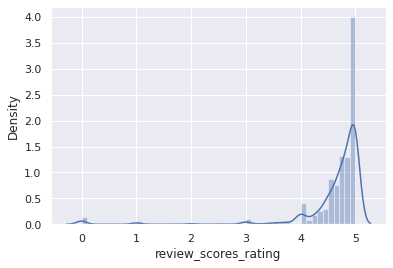

In [ ]:
#ranking review_scores_rating
df_score['review_scores_rating'].describe()
#plot review_scores_rating distribution 
sns.distplot(df_score['review_scores_rating'])
#label x axis
plt.xlabel('review_scores_rating')
plt.rcParams['figure.figsize'] = (15, 20)
#show plot
plt.show()

<ipython-input-94-d112f221d6a0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



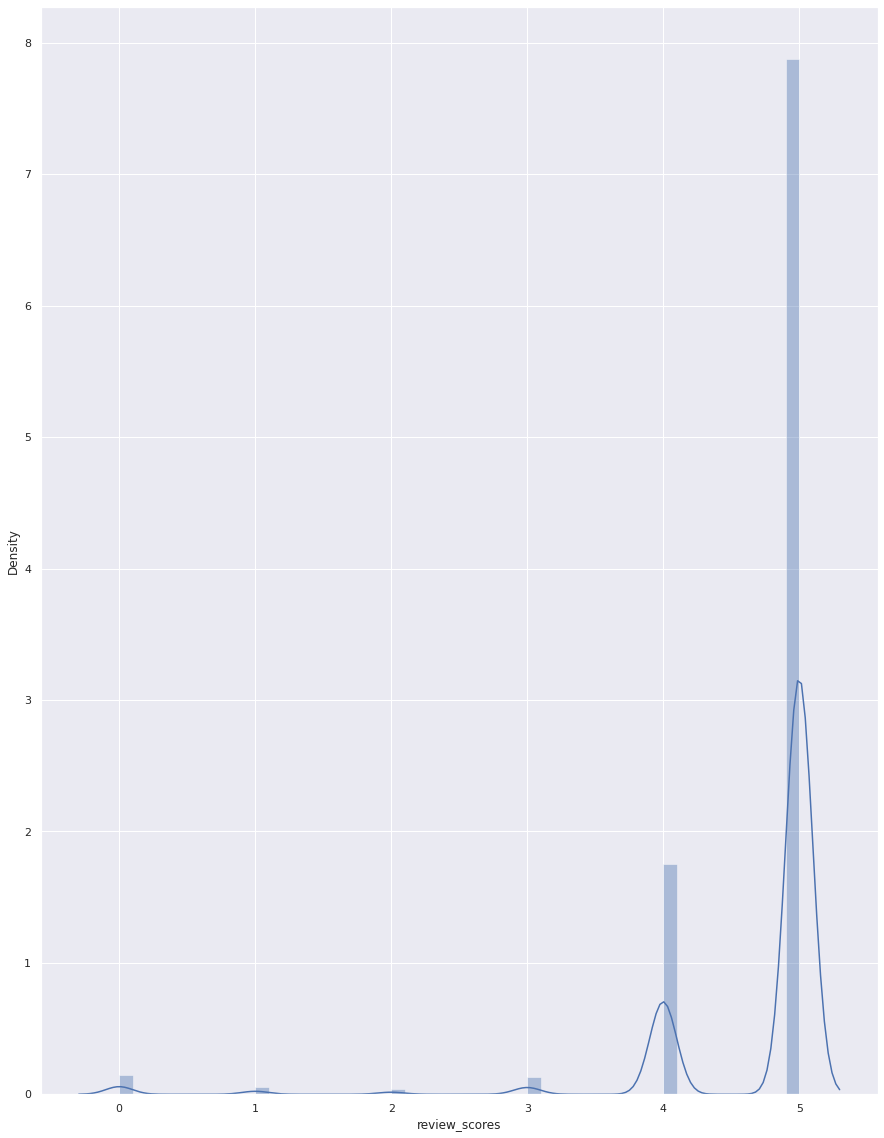

In [ ]:
#create new column review_scores with review_scores_rating keeping only a single digit 
#df_score['review_scores'] = df_score['review_scores_rating'].apply(lambda x: int(str(x)[0]))
#show df_score head
df_score['review_scores'] = df_score['review_scores_rating'].round()
#show df_score head
df_score.head(20)
#plot review_scores distribution
sns.distplot(df_score['review_scores'])


In [ ]:
#plot review_scores 
import plotly.express as px
lat = np.mean(df_score['latitude'])
lon = np.mean(df_score['longitude'])
#plot review_scores on map color scale by review_scores
fig = px.scatter_mapbox(df_score, lat="latitude", lon="longitude", color="review_scores", size="review_scores", 
                        color_continuous_scale=px.colors.cyclical.Edge_r, size_max=3, zoom=10, mapbox_style="carto-positron", opacity=0.5)
#fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig size as 800x1000
fig.update_layout(height=800, width=1000)
#title as NYC Airbnb review scores 0-5
fig.show()

In [ ]:
#create new dataframe count frequency of review_scores 0-5
df_score_count = df_score['review_scores'].value_counts().reset_index()
#rename columns
df_score_count.columns = ['review_scores','count']
#show df_score_count
df_score_count

review_scores  count
0            5.0  24833
1            4.0   5521
2            0.0    456
3            3.0    405
4            1.0    179
5            2.0    125

##Sentiment analysis with nltk

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words("english"))
punctuations = """!()-![]{};:,+'"\,<>./?@#$%^&*_~Â""" #List of punctuation to remove
#remove comments that are not in english
df_comments['comments'] = df_comments['comments'].apply(lambda x: x if x.isascii() else np.nan)
#drop missing values
df_comments.dropna(inplace=True)
#show df_comments head

 #function to remove punctuation, stopwords and split text into words
def remove_punctuation(text):
    for punctuation in punctuations:
        text = text.replace(punctuation, "")
    return text
#function to remove stopwords
def remove_stopwords(text):
    text = [word for word in text.split() if word not in stopwords_list]
    return " ".join(text)
#function to remove punctuation and stopwords
def remove_punctuation_stopwords(text):
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    return text
#apply remove_punctuation_stopwords function to comments column
df_comments['comments'] = df_comments['comments'].apply(remove_punctuation_stopwords)

#show df_comments head
df_comments.head(20)
#drop all rows with comments that are empty
df_comments = df_comments[df_comments['comments'] != '']
#show df_comments head
df_comments.head(20)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-97-6acfca5f0706>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-6acfca5f0706>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

listing_id                                           comments
0         2539                                         Great host
1         2539  Nice room price Great neighborhood John accomm...
2         2539                        Very nice apt New remodeled
3         2539  Great place stay John great host great man The...
5         2539  I really enjoyed time deep south Brooklyn John...
6         2539  John great host He responsive visit He really ...
7         2539              Clean quiet wellrun home close subway
8         2539  John always responsive stay He answers back im...
10        2595                                   Great experience
11        2595  Ive stayed friend Midtown Castle six days love...
12        2595  Weve staying 9 nights enjoying center city nev...
13        2595  We wonderful stay Jennifers charming apartment...
14        2595  Hi everyone brWould say greatest compliments J...
15        2595  Jennifer friendly helpful place exactly advert...
17        2595  Jennifers place great midtown location close s...
18        2595  Jennifer nice host Everything clean really tak...
19        2595  This cute studio wonderful location quirky int...
20        2595  A great location comfortable space helpful hos...
21        2595  Jennifers place cozy short walking distance Ti...
22        2595  We hebben genoten van ons verblijf het apparte...

In [ ]:
#analyse sentiment intensity of comments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
#loop to get sentiment intensity of first 5 comments
for comment in df_comments['comments'].values[:5]:
    print(comment)
    sentiment_score = sid.polarity_scores(comment)
    for score in sorted(sentiment_score):
        print('{0}: {1}, '.format(score, sentiment_score[score]), end='')
    print()


Great host
compound: 0.6249, neg: 0.0, neu: 0.196, pos: 0.804, 
Nice room price Great neighborhood John accommodating Bottles water room nice touch much appreciated
compound: 0.9186, neg: 0.0, neu: 0.435, pos: 0.565, 
Very nice apt New remodeled
compound: 0.4754, neg: 0.0, neu: 0.564, pos: 0.436, 
Great place stay John great host great man The house homy Youll feel right home
compound: 0.9231, neg: 0.0, neu: 0.494, pos: 0.506, 
I really enjoyed time deep south Brooklyn John excellent host attentive concerns I welcome presence hes around brbrThe room great space supercomfy bed lovely traditional ceiling fan The street pleasant treelined quiet townhouse located short convenient walk F train perfect getting office herebrbrIts easy see Johns Super Host I look forward staying
compound: 0.9875, neg: 0.0, neu: 0.526, pos: 0.474, 


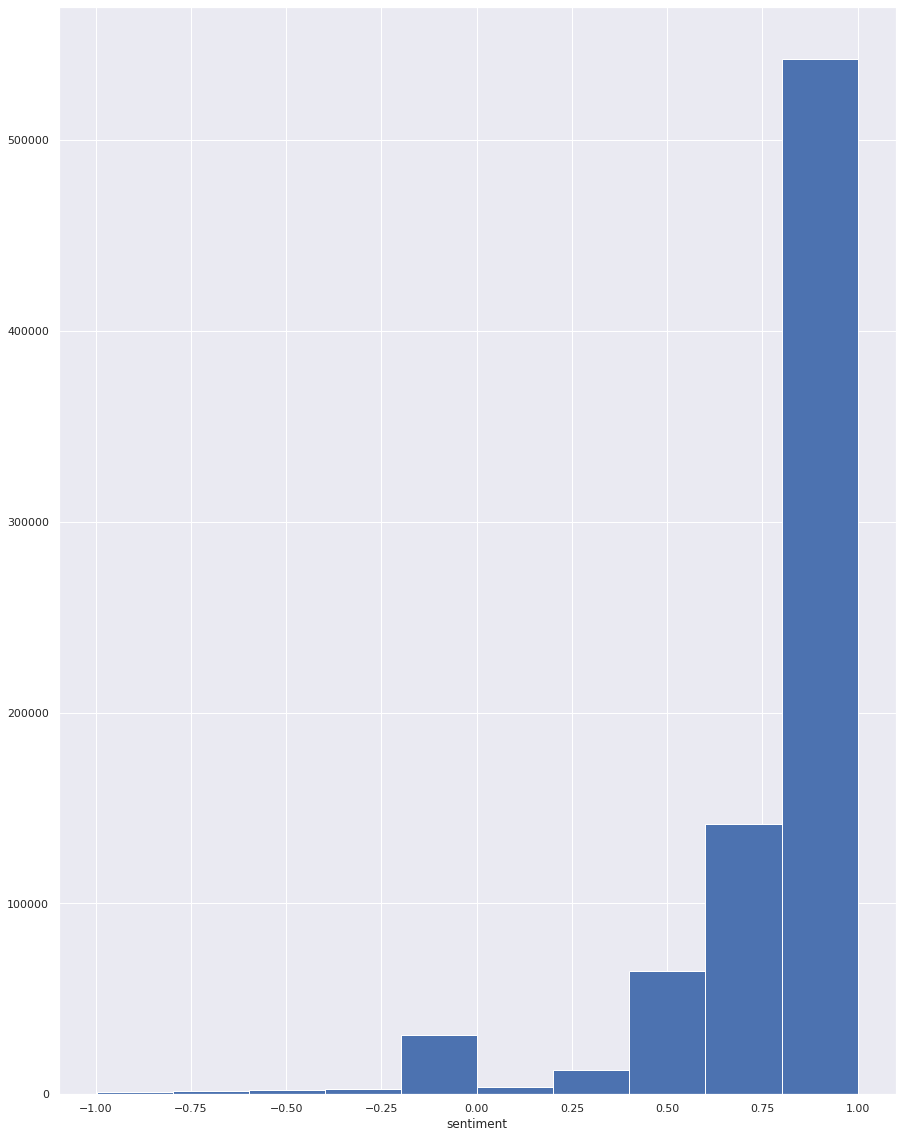

In [ ]:
#plot frequency of negative, neutral and positive comments
df_comments['sentiment'] = df_comments['comments'].apply(lambda x: sid.polarity_scores(x)['compound'])
df_comments['sentiment'].hist()
#label x axis
plt.xlabel('sentiment')
#show plot
plt.show()

In [ ]:
#create new column for positive, negative and neutral scores
df_comments['neg'] = df_comments['comments'].apply(lambda x: sid.polarity_scores(x)['neg'])
df_comments['neu'] = df_comments['comments'].apply(lambda x: sid.polarity_scores(x)['neu'])
df_comments['pos'] = df_comments['comments'].apply(lambda x: sid.polarity_scores(x)['pos'])
#show df_comments head
df_comments.head(20)

listing_id                                           comments  sentiment  \
0         2539                                         Great host     0.6249   
1         2539  Nice room price Great neighborhood John accomm...     0.9186   
2         2539                        Very nice apt New remodeled     0.4754   
3         2539  Great place stay John great host great man The...     0.9231   
5         2539  I really enjoyed time deep south Brooklyn John...     0.9875   
6         2539  John great host He responsive visit He really ...     0.9649   
7         2539              Clean quiet wellrun home close subway     0.4019   
8         2539  John always responsive stay He answers back im...     0.9442   
10        2595                                   Great experience     0.6249   
11        2595  Ive stayed friend Midtown Castle six days love...     0.9723   
12        2595  Weve staying 9 nights enjoying center city nev...     0.9136   
13        2595  We wonderful stay Jennifers charming apartment...     0.9382   
14        2595  Hi everyone brWould say greatest compliments J...     0.9843   
15        2595  Jennifer friendly helpful place exactly advert...     0.9313   
17        2595  Jennifers place great midtown location close s...     0.9022   
18        2595  Jennifer nice host Everything clean really tak...     0.8880   
19        2595  This cute studio wonderful location quirky int...     0.9756   
20        2595  A great location comfortable space helpful hos...     0.9360   
21        2595  Jennifers place cozy short walking distance Ti...     0.9001   
22        2595  We hebben genoten van ons verblijf het apparte...     0.0000   

      neg    neu    pos  
0   0.000  0.196  0.804  
1   0.000  0.435  0.565  
2   0.000  0.564  0.436  
3   0.000  0.494  0.506  
5   0.000  0.526  0.474  
6   0.000  0.485  0.515  
7   0.000  0.649  0.351  
8   0.053  0.565  0.383  
10  0.000  0.196  0.804  
11  0.025  0.617  0.358  
12  0.000  0.688  0.312  
13  0.000  0.392  0.608  
14  0.000  0.611  0.389  
15  0.000  0.446  0.554  
17  0.000  0.759  0.241  
18  0.000  0.439  0.561  
19  0.000  0.488  0.512  
20  0.000  0.296  0.704  
21  0.000  0.686  0.314  
22  0.000  1.000  0.000

In [ ]:
#print the most negative comment
print(df_comments[df_comments['neg'] == 1.0]['comments'].values[0])
#print the most positive comment
print(df_comments[df_comments['pos'] == 1.0]['comments'].values[0])

No I
Great perfect


In [ ]:
#print percentage of positive, negative and neutral comments
print('Percentage of positive comments: ', df_comments[df_comments['sentiment'] > 0.0].shape[0]/df_comments.shape[0])
print('Percentage of neutral comments: ', df_comments[df_comments['sentiment'] == 0.0].shape[0]/df_comments.shape[0])
print('Percentage of negative comments: ', df_comments[df_comments['sentiment'] < 0.0].shape[0]/df_comments.shape[0])


Percentage of positive comments:  0.9518548428239552
Percentage of neutral comments:  0.03564722585493988
Percentage of negative comments:  0.012497931321105004


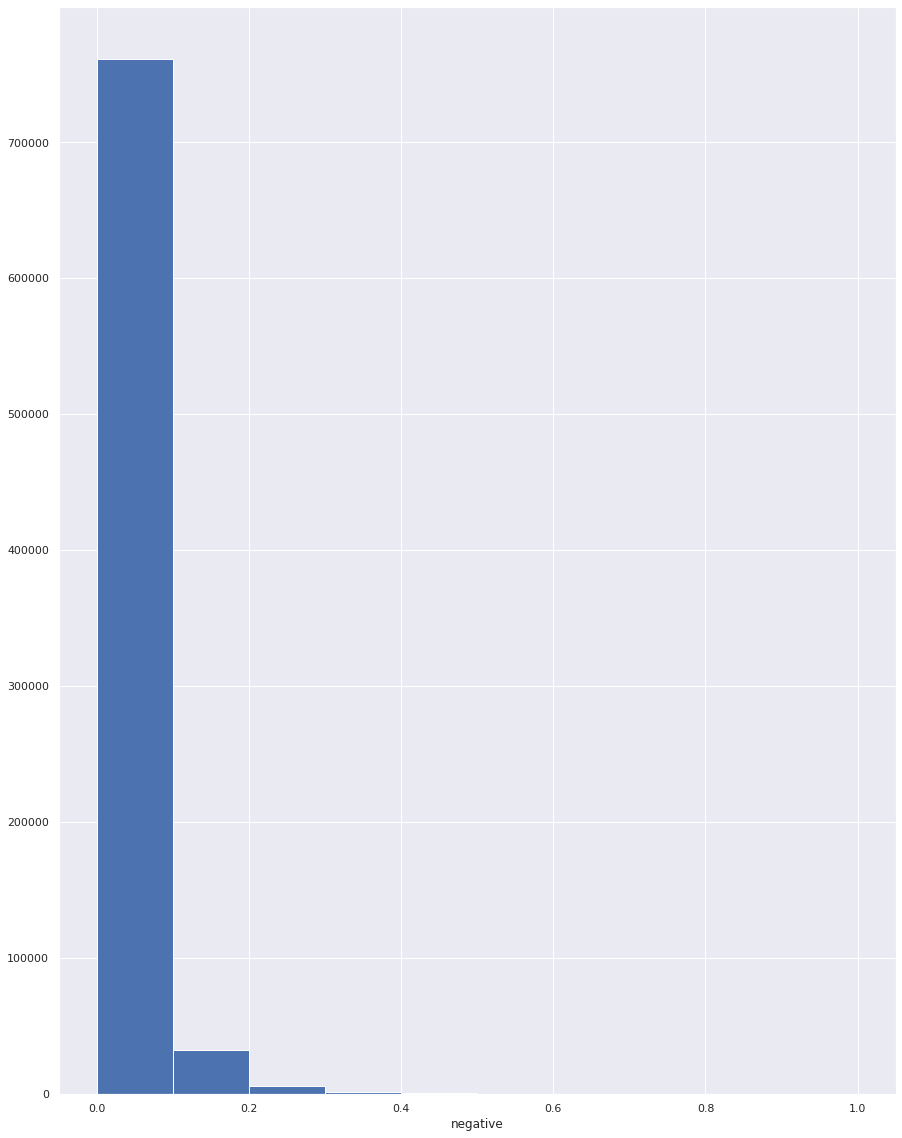

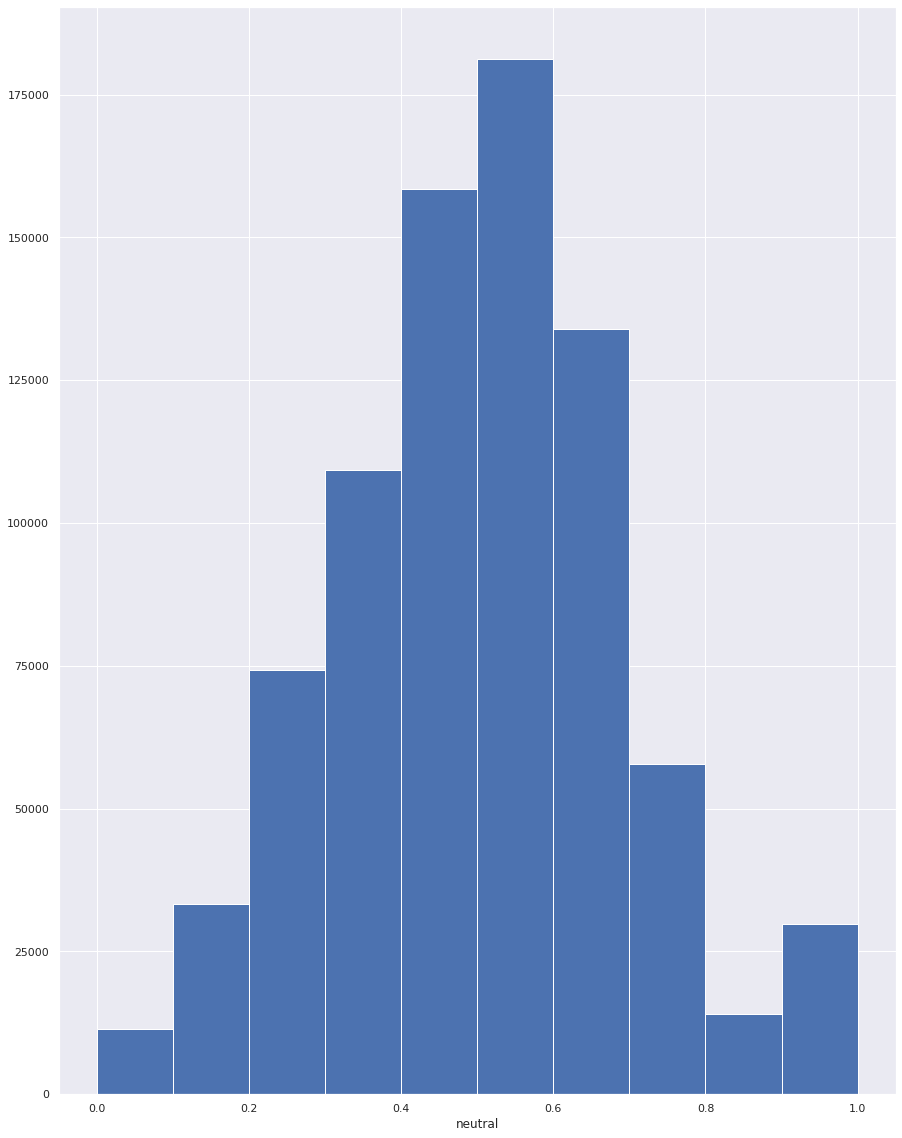

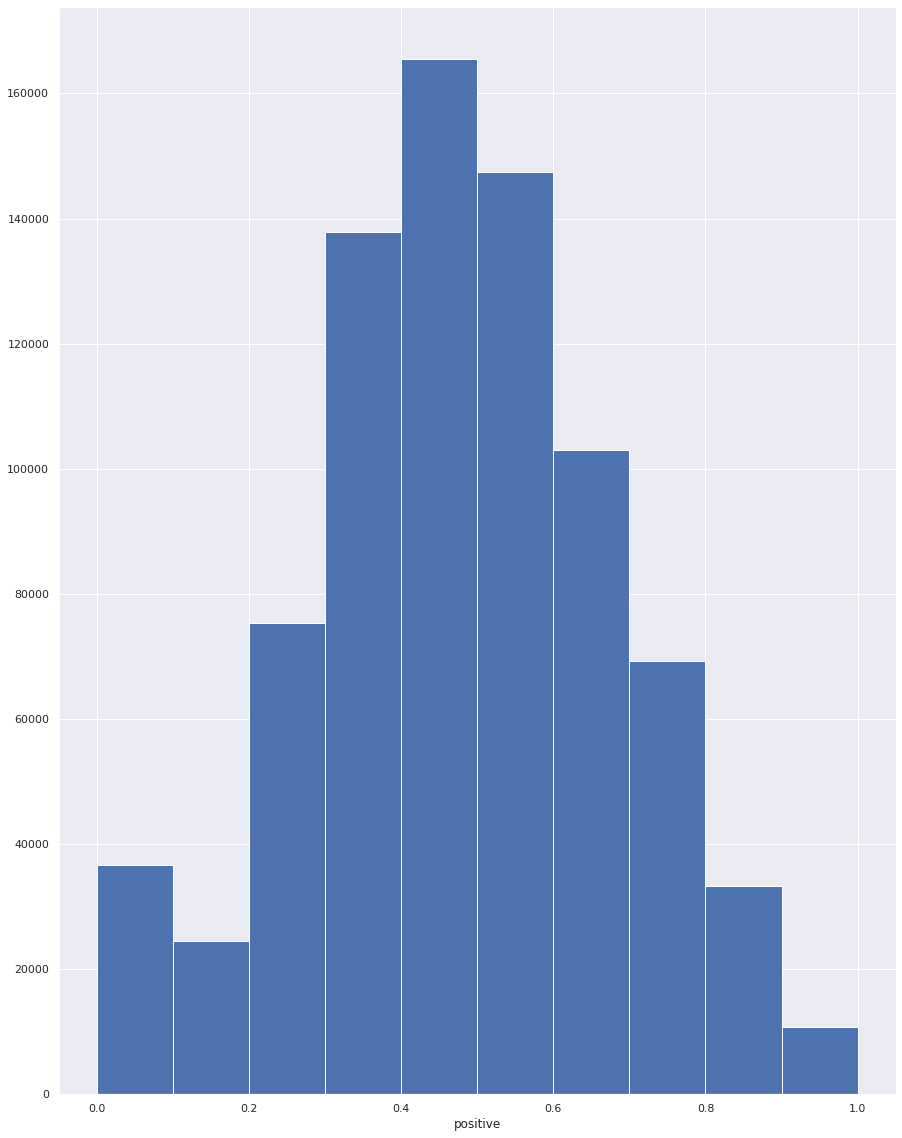

In [ ]:
#plot frequency of negative, neutral and positive comments
df_comments['neg'].hist()
#label x axis
plt.xlabel('negative')
#show plot
plt.show()
#plot frequency of negative, neutral and positive comments
df_comments['neu'].hist()
#label x axis
plt.xlabel('neutral')
#show plot
plt.show()
#plot frequency of negative, neutral and positive comments
df_comments['pos'].hist()
#label x axis
plt.xlabel('positive')
#show plot
plt.show()

In [ ]:
#find most common words in comments
from collections import Counter
#split comments into words
df_comments['comments'] = df_comments['comments'].apply(lambda x: x.split())
#show df_comments head
df_comments.head(20)
#find most common words in comments
Counter([word for comment in df_comments['comments'].values for word in comment]).most_common(20)

[('The', 381067),
 ('I', 380820),
 ('place', 379317),
 ('stay', 353769),
 ('great', 326704),
 ('apartment', 228764),
 ('clean', 224530),
 ('location', 222912),
 ('host', 189273),
 ('nice', 150111),
 ('We', 146355),
 ('Great', 145203),
 ('room', 126121),
 ('recommend', 125622),
 ('comfortable', 124136),
 ('would', 120777),
 ('us', 118903),
 ('subway', 106294),
 ('good', 99904),
 ('really', 97315)]

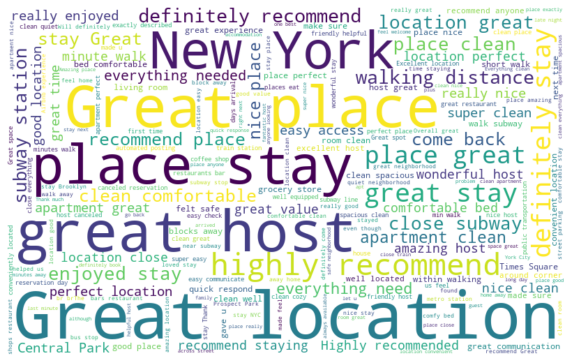

In [ ]:
#install wordcloud
#!pip install wordcloud
#create wordcloud of most common words in comments
from wordcloud import WordCloud
#join comments into one string
comments = ' '.join([word for comment in df_comments['comments'].values for word in comment])
#show comments
comments
#initialize WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(comments)
#plot wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

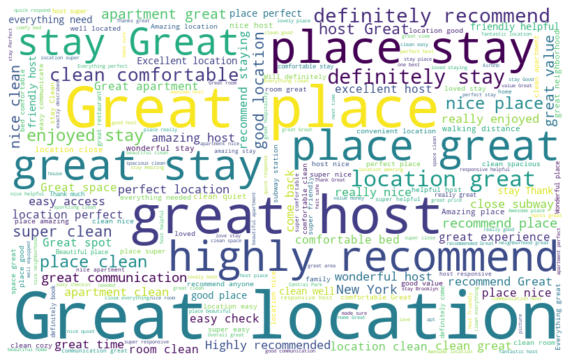

In [ ]:
#create workcloud for positive comments
#join positive comments into one string
pos_comments = ' '.join([word for comment in df_comments[df_comments['pos'] > 0.5]['comments'].values for word in comment])
#show pos_comments
pos_comments
#initialize WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(pos_comments)
#plot wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


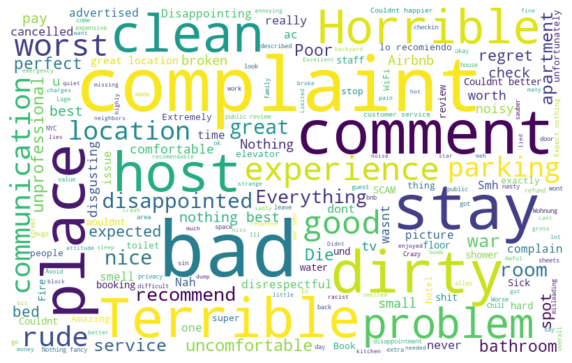

In [ ]:
#create workcloud for negative comments
#join negative comments into one string
neg_comments = ' '.join([word for comment in df_comments[df_comments['neg'] > 0.5]['comments'].values for word in comment])
#show neg_comments
neg_comments
#plot wordcloud with white background in the shape of new york city
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(neg_comments)
#plot wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

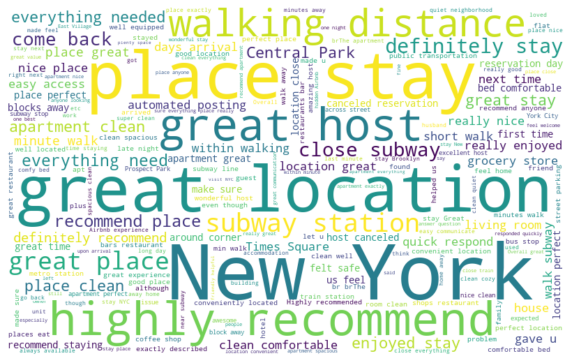

In [ ]:
#create workcloud for neutral comments
#join neutral comments into one string
neu_comments = ' '.join([word for comment in df_comments[df_comments['neu'] > 0.5]['comments'].values for word in comment])
#show neu_comments
neu_comments
#plot wordcloud with white background in the shape of new york city
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(neu_comments)
#plot wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#print the most negative comment
print(df_comments[df_comments['neg'] == df_comments['neg'].max()]['comments'].values[0])
#print the most positive comment
print(df_comments[df_comments['pos'] == df_comments['pos'].max()]['comments'].values[0])

['No', 'I']
['Great', 'perfect']


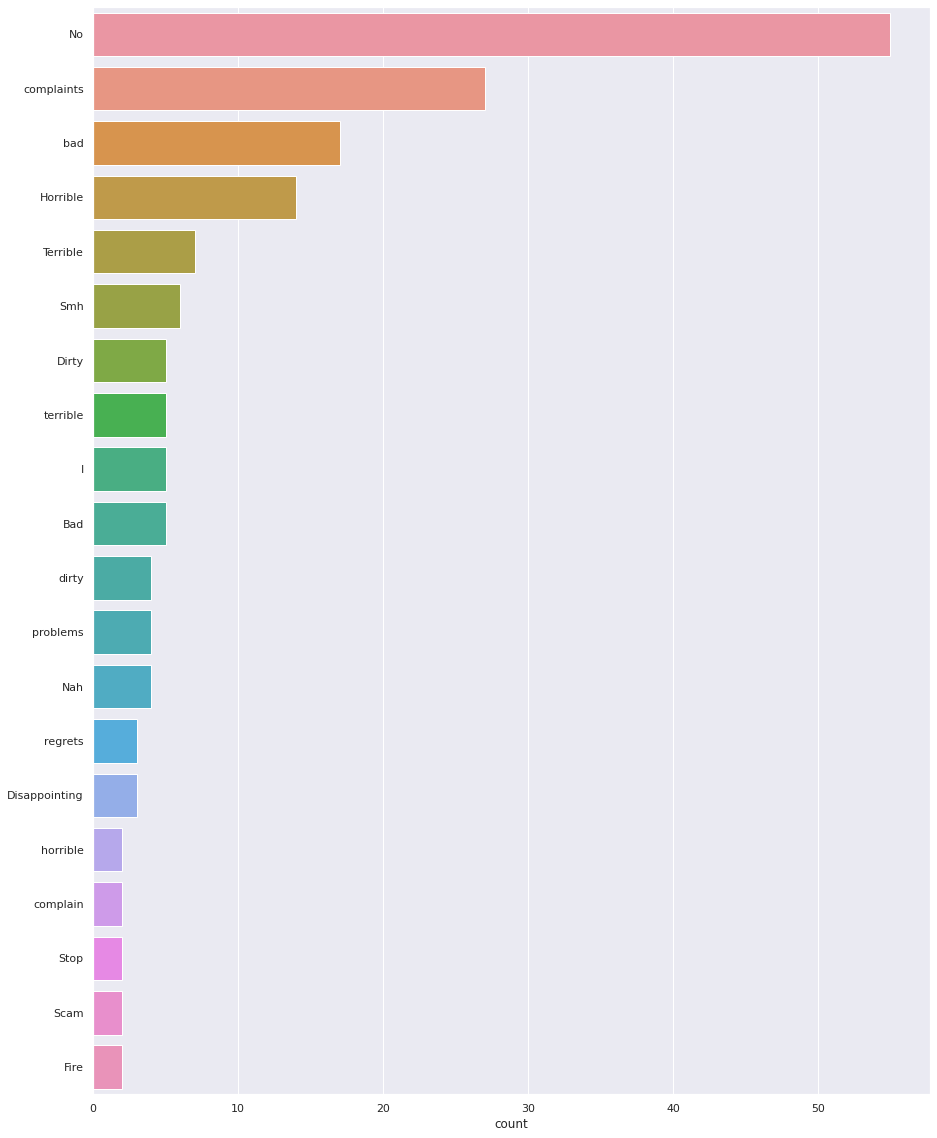

In [ ]:
#count what occurs most often in negative comment
Counter([word for comment in df_comments[df_comments['neg'] == df_comments['neg'].max()]['comments'].values for word in comment]).most_common(20)
#plot what occurs most often in negative comment using seaborn countplot 
sns.countplot(y=[word for comment in df_comments[df_comments['neg'] == df_comments['neg'].max()]['comments'].values for word in comment], order=pd.Series([word for comment in df_comments[df_comments['neg'] == df_comments['neg'].max()]['comments'].values for word in comment]).value_counts().index[:20])
#show plot
plt.show()

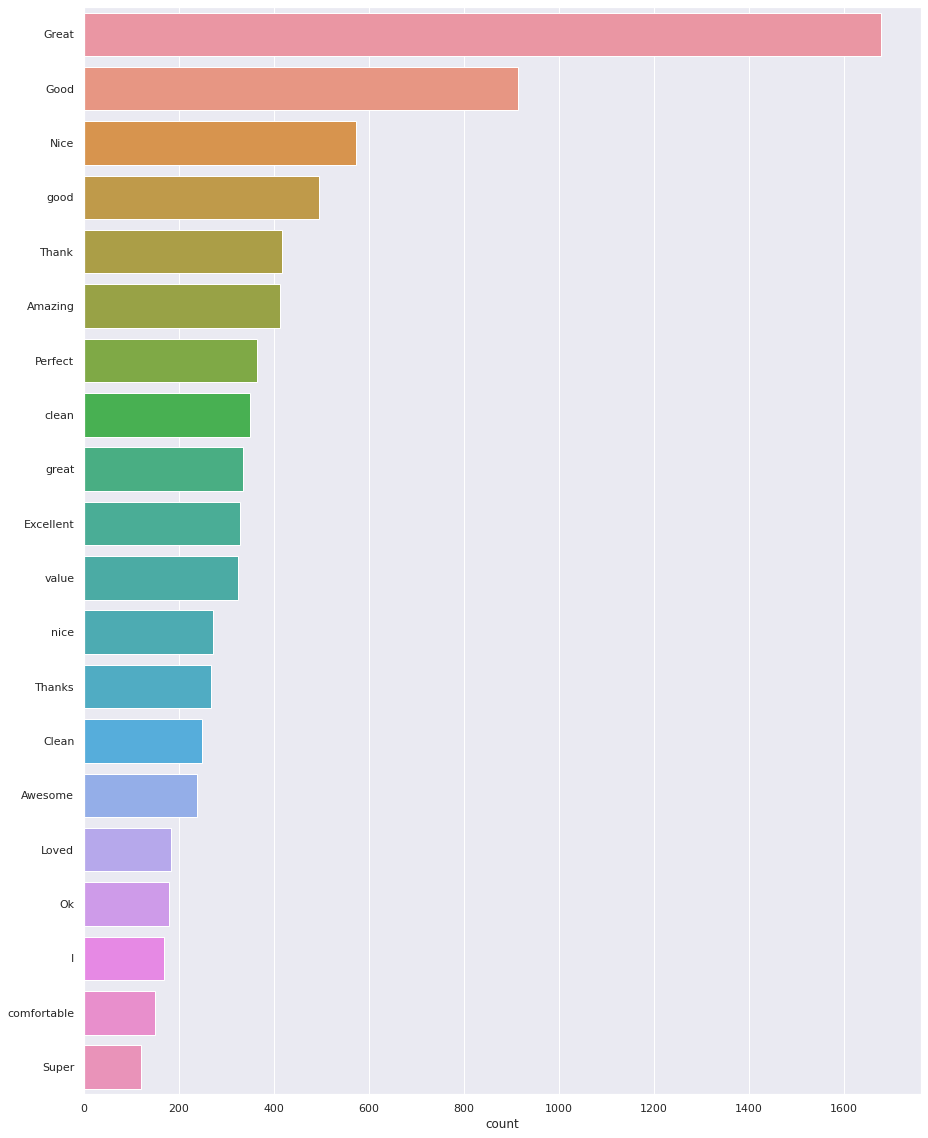

In [ ]:
#count what occurs most often in positive comment
Counter([word for comment in df_comments[df_comments['pos'] == df_comments['pos'].max()]['comments'].values for word in comment]).most_common(20)
#plot what occurs most often in positive comment using seaborn countplot
sns.countplot(y=[word for comment in df_comments[df_comments['pos'] == df_comments['pos'].max()]['comments'].values for word in comment], order=pd.Series([word for comment in df_comments[df_comments['pos'] == df_comments['pos'].max()]['comments'].values for word in comment]).value_counts().index[:20])
#show plot
plt.show()


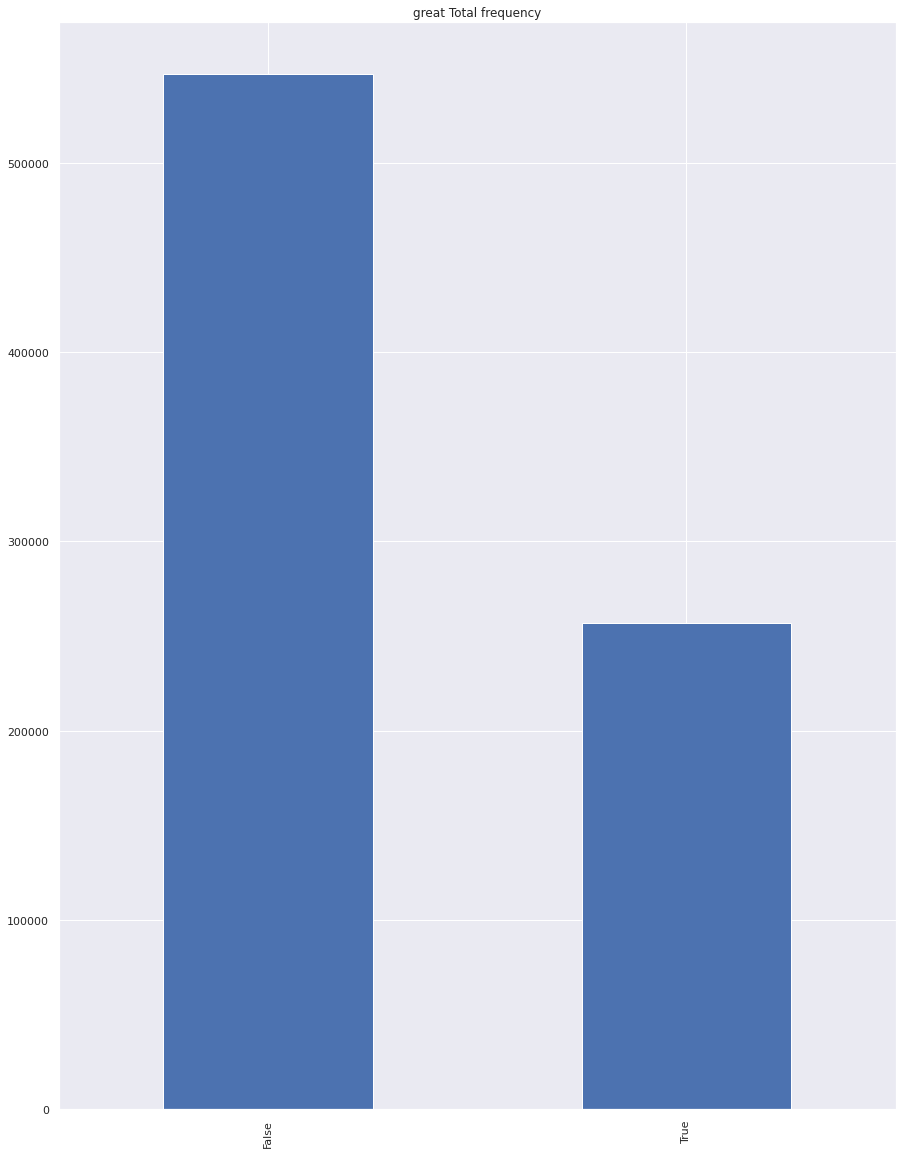

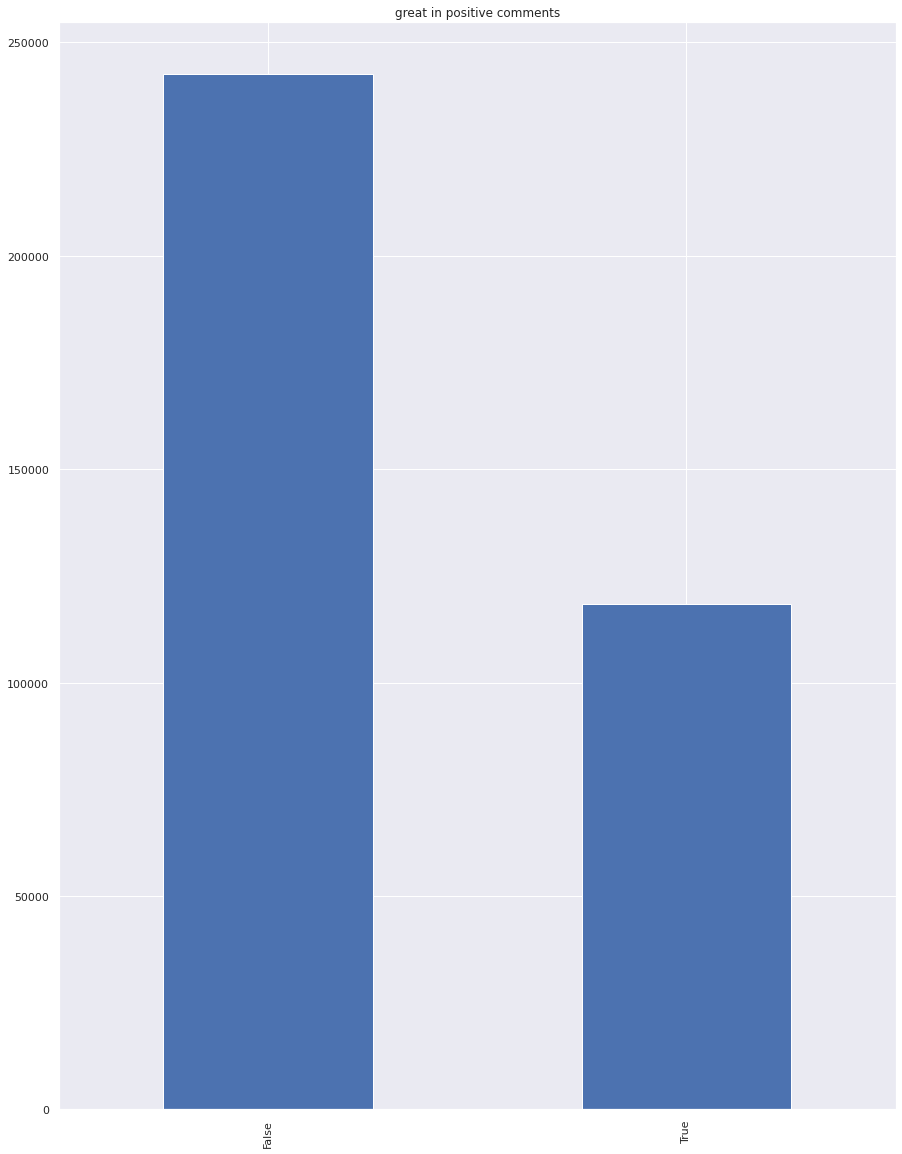

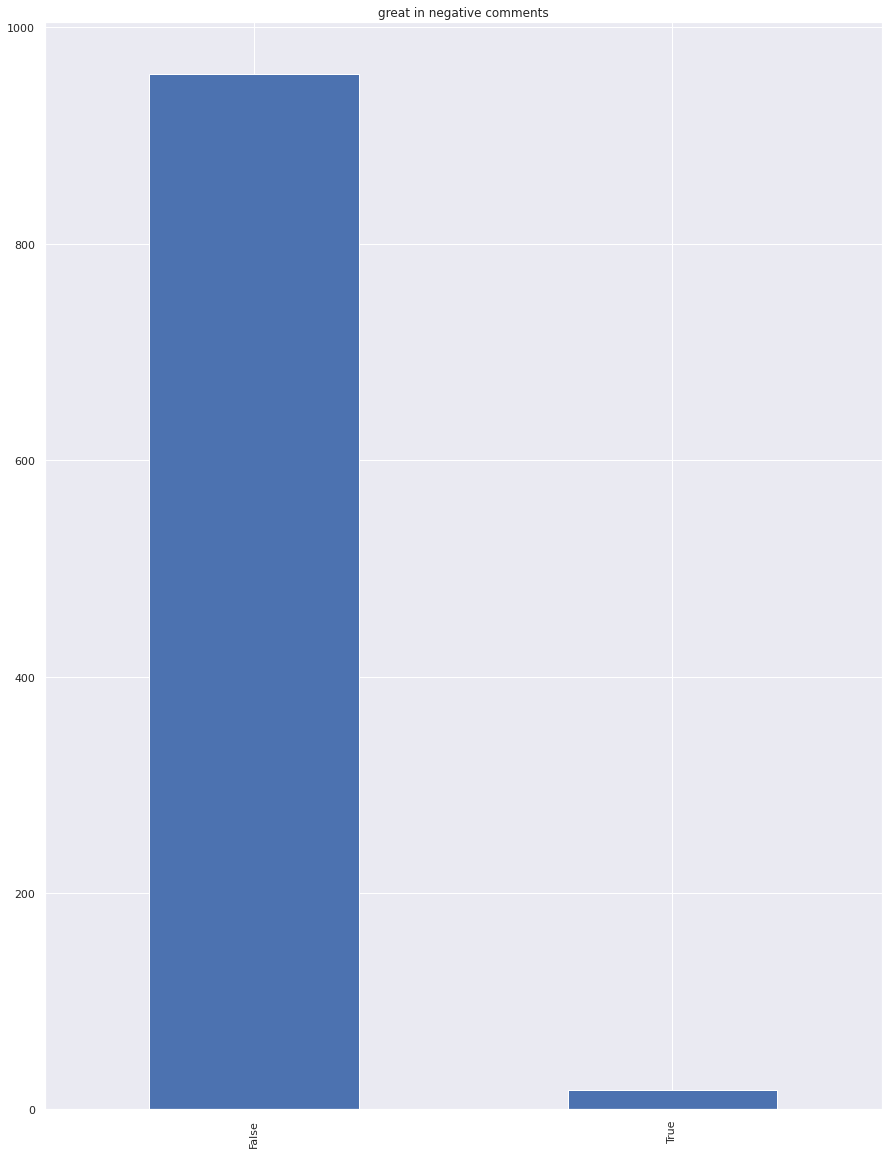

In [ ]:
chosen_word = ['great']
#find how frequently each smell occurs in the comments
def keyword_frequency(keywords): 
    for word in keywords:
        df_comments[word] = df_comments['comments'].apply(lambda x: word in x)
    #show df_comments head
    df_comments.head(20)
    #plot frequency of each smell in the comments
    for word in keywords:
        df_comments[word].value_counts().plot(kind='bar')
        plt.title(word + ' Total frequency')
        plt.show()
    #plot frequency of each word in the positive comments
    for word in keywords:
        df_comments[df_comments['pos'] > 0.5][word].value_counts().plot(kind='bar')
        plt.title(word + ' in positive comments')
        plt.show()
    #plot frequency of each word in the negative comments
    for word in keywords:
        df_comments[df_comments['neg'] > 0.5][word].value_counts().plot(kind='bar')
        plt.title(word + ' in negative comments')
        plt.show()

keyword_frequency(chosen_word)
    